In [1]:
### Import the required libraries
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
import tensorflow.keras as keras
tf.compat.v1.disable_eager_execution()

import os
import sys

import xarray as xr
import xmitgcm
from xmitgcm import open_mdsdataset

# Append to sys.path the absolute path to src/XAIRT
path_list = os.path.abspath('').split('/')
path_src_XAIRT = ''
for link in path_list[:-1]:
    path_src_XAIRT = path_src_XAIRT+link+'/'
sys.path.append(path_src_XAIRT+'/src')

# Now import module XAIRT
from XAIRT import *

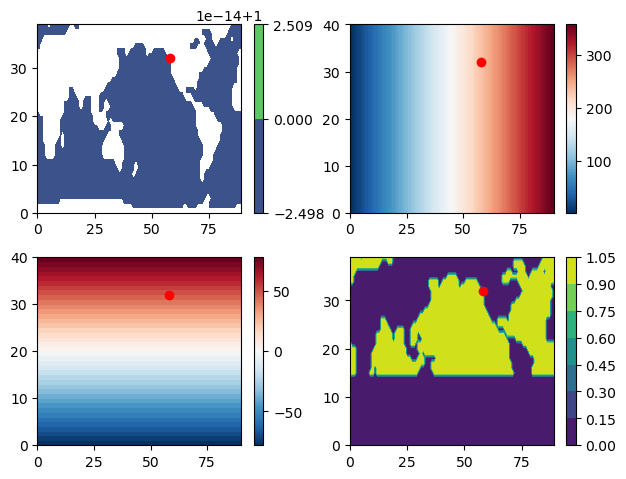

In [2]:
mainDir = '/scratch2/shreyas/global_oce_latlon_4x4'
spinupDir = mainDir + '/run_spinup'
gridDir = spinupDir + '/GRID'

nx = 90
ny = 40
nz = 15

latc = np.reshape(np.fromfile(gridDir + '/YC.data', 
                              dtype = '>f'), (ny, nx))
lonc = np.reshape(np.fromfile(gridDir + '/XC.data', 
                              dtype = '>f'), (ny, nx))
hfacc = np.reshape(np.fromfile(gridDir + '/hFacC.data', 
                              dtype = '>f'), (nz, ny, nx))

pmask = hfacc>0
pmask = pmask.astype(np.float32)
pmask[pmask == 0.0] = np.nan

fig, ax = plt.subplots(2,2)
fig.tight_layout()

pc = ax[0,0].contourf(pmask[0], cmap = 'viridis')
ax[0,0].scatter([58],[32], color = 'red')
fig.colorbar(pc, ax=ax[0,0])

pc = ax[1,0].pcolor(latc, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(pc, ax=ax[1,0])

pc = ax[0,1].pcolor(lonc, cmap = 'RdBu_r')
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(pc, ax=ax[0,1])

latmask = latc >= -20
mask = pmask[0]
mask[np.isnan(mask)] = 0.0
latmask = mask * latmask
pc = ax[1,1].contourf(latmask, cmap = 'viridis')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(pc, ax=ax[1,1])

In [3]:
### Number of wetpoints
int(np.sum(latmask))

1217

In [4]:
exptname = ['run_forward_50yr_dailydump_pk000059400', 
            'run_forward_50yr_dailydump_pk000061200']
diagsets = 'state3d_TS'
costLon  = 240
costLat  = 50

nx = 90
ny = 40
nz = 15

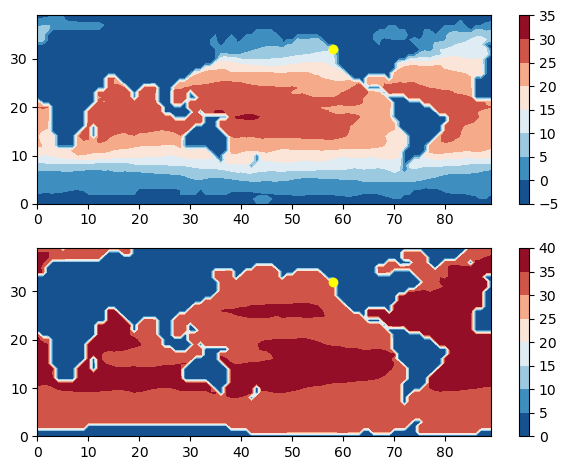

In [5]:
DataDirs = [mainDir + '/run_forward_50yr_dailydump_pk000059400/diags/untarred_output',
             mainDir + '/run_forward_50yr_dailydump_pk000061200/diags/untarred_output']

fileTS0 = DataDirs[0] + '/' + 'state3d_TS.0000594001.data'

T0 = np.reshape(np.fromfile(fileTS0, dtype = '>f')[:nx*ny*nz], (nz, ny, nx))
S0 = np.reshape(np.fromfile(fileTS0, dtype = '>f')[nx*ny*nz:], (nz, ny, nx))

fig, ax = plt.subplots(2,1)
fig.tight_layout()

pc = ax[0].contourf(T0[0]*pmask[0], cmap = 'RdBu_r')
ax[0].scatter([58],[32], color = 'yellow')
fig.colorbar(pc, ax=ax[0])

pc = ax[1].contourf(S0[0]*pmask[0], cmap = 'RdBu_r')
ax[1].scatter([58],[32], color = 'yellow')
fig.colorbar(pc, ax=ax[1])

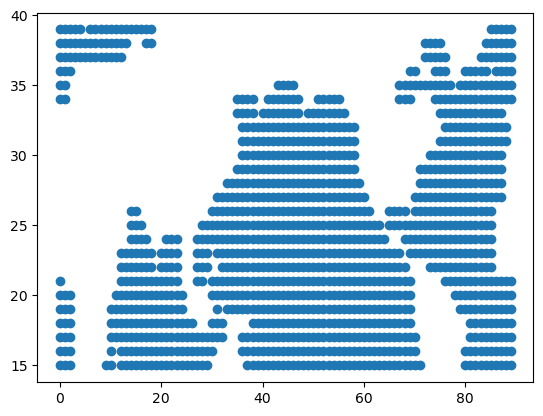

In [6]:
files_list = []
for i in range(18000):
    index = 594001 + i
    files_list.append(DataDirs[0] + '/' + f'state3d_TS.0000{index:6d}.data')
for i in range(18000):
    index = 612001 + i
    files_list.append(DataDirs[1] + '/' + f'state3d_TS.0000{index:6d}.data')
    
thetaSurf = np.zeros((len(files_list), ny, nx))
saltSurf = np.zeros((len(files_list), ny, nx))
cost = np.zeros((len(files_list), 1))
for i in range(len(files_list)):
    thetaSurf[i] = np.reshape(np.fromfile(files_list[i], dtype = '>f')[:nx*ny*nz],
                          (nz, ny, nx))[0]
    cost[i] = thetaSurf[i,32,58]
    saltSurf[i] = np.reshape(np.fromfile(files_list[i], dtype = '>f')[nx*ny*nz:],
                          (nz, ny, nx))[0]
    
wetpoints = np.nonzero(latmask)
thetaSurfWet = thetaSurf[:, wetpoints[0], wetpoints[1]]
saltSurfWet = saltSurf[:, wetpoints[0], wetpoints[1]]
plt.scatter(wetpoints[1], wetpoints[0])

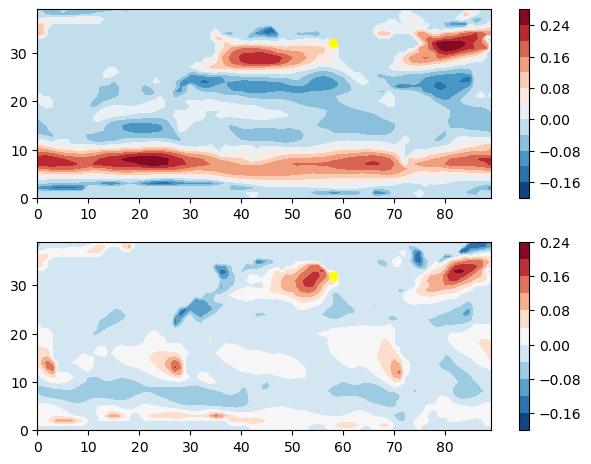

In [7]:
fileAtm0 = DataDirs[0] + '/' + 'state2d_atm.0000594001.data'

tauX0 = np.reshape(np.fromfile(fileAtm0, dtype = '>f')[7*nx*ny:8*nx*ny], (ny, nx))
tauY0 = np.reshape(np.fromfile(fileAtm0, dtype = '>f')[8*nx*ny:9*nx*ny], (ny, nx))

fig, ax = plt.subplots(2,1)
fig.tight_layout()

pc = ax[0].contourf(tauX0*pmask[0], cmap = 'RdBu_r', levels = 10)
ax[0].scatter([58],[32], color = 'yellow')
fig.colorbar(pc, ax=ax[0])

pc = ax[1].contourf(tauY0*pmask[0], cmap = 'RdBu_r', levels = 10)
ax[1].scatter([58],[32], color = 'yellow')
fig.colorbar(pc, ax=ax[1])

In [8]:
files_list = []
for i in range(18000):
    index = 594001 + i
    files_list.append(DataDirs[0] + '/' + f'state2d_atm.0000{index:6d}.data')
for i in range(18000):
    index = 612001 + i
    files_list.append(DataDirs[1] + '/' + f'state2d_atm.0000{index:6d}.data')
    
tauX = np.zeros((len(files_list), ny, nx))
tauY = np.zeros((len(files_list), ny, nx))

for i in range(len(files_list)):
    tauX[i] = np.reshape(np.fromfile(files_list[i], dtype = '>f')[7*nx*ny:8*nx*ny],
                          (ny, nx))
    tauY[i] = np.reshape(np.fromfile(files_list[i], dtype = '>f')[8*nx*ny:9*nx*ny],
                          (ny, nx))

wetpoints = np.nonzero(latmask)
tauXWet = tauX[:, wetpoints[0], wetpoints[1]]
tauYWet = tauY[:, wetpoints[0], wetpoints[1]]
tauWet = np.concatenate((tauXWet,tauYWet), axis = 1)

## Concurrent

### Theta

In [19]:
Layers = [{'size': thetaSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(thetaSurfWet, cost, 
                    Layers, Losses,
                    'adam', ['mae'], 
                    100, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(thetaSurfWet)

L = TrainLR(thetaSurfWet, cost, y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(thetaSurfWet)

Train on 28800 samples, validate on 7200 samples
Epoch 1/50
28700/28800 [============================>.] - ETA: 0s - loss: 40.2303 - mae: 2.1265
Epoch 1: val_loss improved from inf to 0.04505, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 2s 54us/sample - loss: 40.0907 - mae: 2.1197 - val_loss: 0.0451 - val_mae: 0.1826
Epoch 2/50
28800/28800 [==============================] - ETA: 0s - loss: 0.0160 - mae: 0.1010
Epoch 2: val_loss improved from 0.04505 to 0.00541, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 2s 53us/sample - loss: 0.0160 - mae: 0.1010 - val_loss: 0.0054 - val_mae: 0.0602
Epoch 3/50
28700/28800 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0495
Epoch 3: val_loss improved from 0.00541 to 0.00354, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 1s 49us/sample - loss: 0.0038 - mae: 0.0495 - v

Epoch 29/50
28200/28800 [============================>.] - ETA: 0s - loss: 0.0628 - mae: 0.1287
Epoch 29: val_loss did not improve from 0.00046
28800/28800 [==============================] - 1s 50us/sample - loss: 0.0616 - mae: 0.1267 - val_loss: 0.0027 - val_mae: 0.0491
Epoch 30/50
28100/28800 [============================>.] - ETA: 0s - loss: 0.1258 - mae: 0.1838
Epoch 30: val_loss did not improve from 0.00046
28800/28800 [==============================] - 1s 46us/sample - loss: 0.1267 - mae: 0.1874 - val_loss: 0.1541 - val_mae: 0.3918
Epoch 31/50
28500/28800 [============================>.] - ETA: 0s - loss: 0.1338 - mae: 0.2187
Epoch 31: val_loss did not improve from 0.00046
28800/28800 [==============================] - 1s 42us/sample - loss: 0.1327 - mae: 0.2178 - val_loss: 0.0020 - val_mae: 0.0393
Epoch 32/50
27800/28800 [===========================>..] - ETA: 0s - loss: 0.0771 - mae: 0.1543
Epoch 32: val_loss did not improve from 0.00046
28800/28800 [===========================

In [20]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, thetaSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

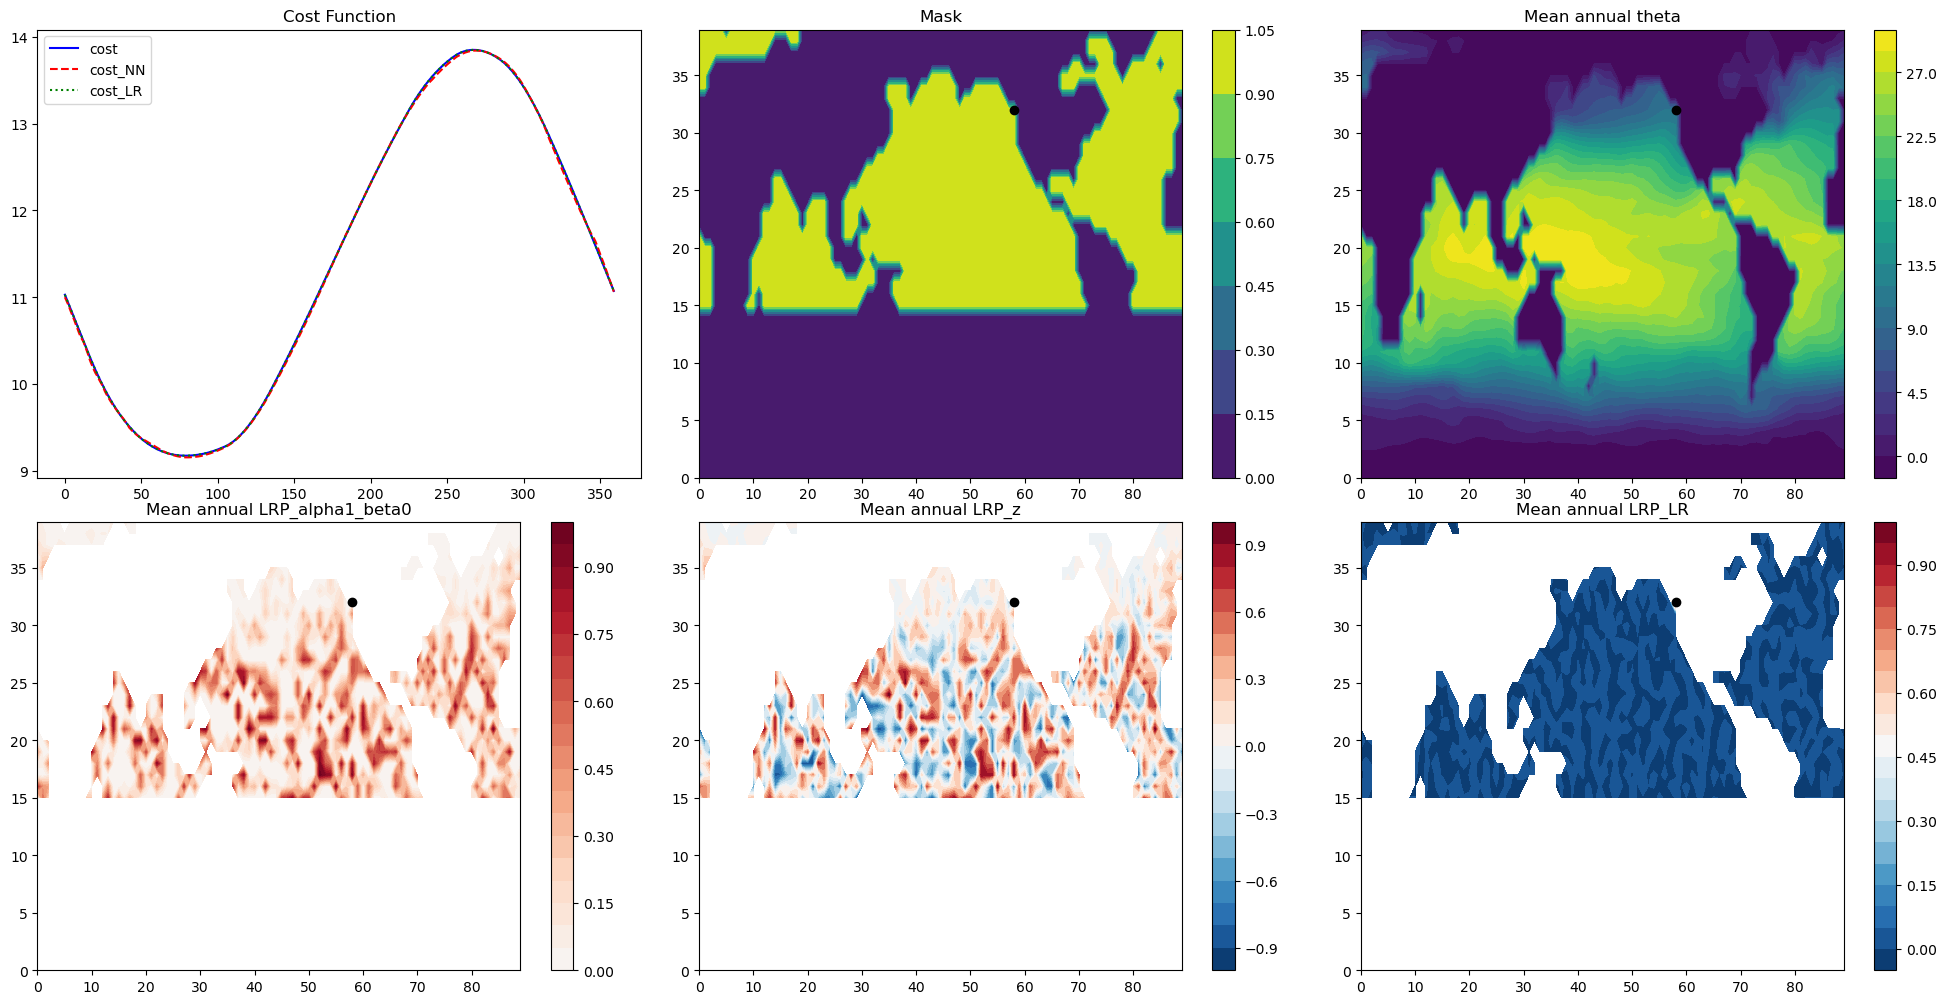

In [22]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[:360], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(thetaSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual theta')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### Salinity

In [16]:
Layers = [{'size': saltSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(saltSurfWet, cost, 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(saltSurfWet)

L = TrainLR(saltSurfWet, cost, y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(saltSurfWet)

Train on 28800 samples, validate on 7200 samples
Epoch 1/50
28450/28800 [============================>.] - ETA: 0s - loss: 13.3438 - mae: 2.2700
Epoch 1: val_loss improved from inf to 6.69422, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 4s 151us/sample - loss: 13.2312 - mae: 2.2620 - val_loss: 6.6942 - val_mae: 2.2687
Epoch 2/50
28720/28800 [============================>.] - ETA: 0s - loss: 5.9055 - mae: 1.9327
Epoch 2: val_loss improved from 6.69422 to 2.71453, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 5s 171us/sample - loss: 5.8920 - mae: 1.9298 - val_loss: 2.7145 - val_mae: 1.3209
Epoch 3/50
28440/28800 [============================>.] - ETA: 0s - loss: 3.9542 - mae: 1.5993
Epoch 3: val_loss did not improve from 2.71453
28800/28800 [==============================] - 4s 130us/sample - loss: 3.9386 - mae: 1.5962 - val_loss: 3.3890 - val_mae: 1.6125
Epoch 4/50
28590/28800

28690/28800 [============================>.] - ETA: 0s - loss: 0.1018 - mae: 0.2535
Epoch 28: val_loss improved from 0.02812 to 0.01704, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 4s 154us/sample - loss: 0.1027 - mae: 0.2545 - val_loss: 0.0170 - val_mae: 0.1016
Epoch 29/50
28770/28800 [============================>.] - ETA: 0s - loss: 0.1007 - mae: 0.2535
Epoch 29: val_loss did not improve from 0.01704
28800/28800 [==============================] - 5s 162us/sample - loss: 0.1008 - mae: 0.2535 - val_loss: 0.0351 - val_mae: 0.1516
Epoch 30/50
28800/28800 [==============================] - ETA: 0s - loss: 0.1022 - mae: 0.2541
Epoch 30: val_loss did not improve from 0.01704
28800/28800 [==============================] - 5s 162us/sample - loss: 0.1022 - mae: 0.2541 - val_loss: 0.0730 - val_mae: 0.2393
Epoch 31/50
28470/28800 [============================>.] - ETA: 0s - loss: 0.0912 - mae: 0.2400
Epoch 31: val_loss did not improve fro

In [17]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, saltSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

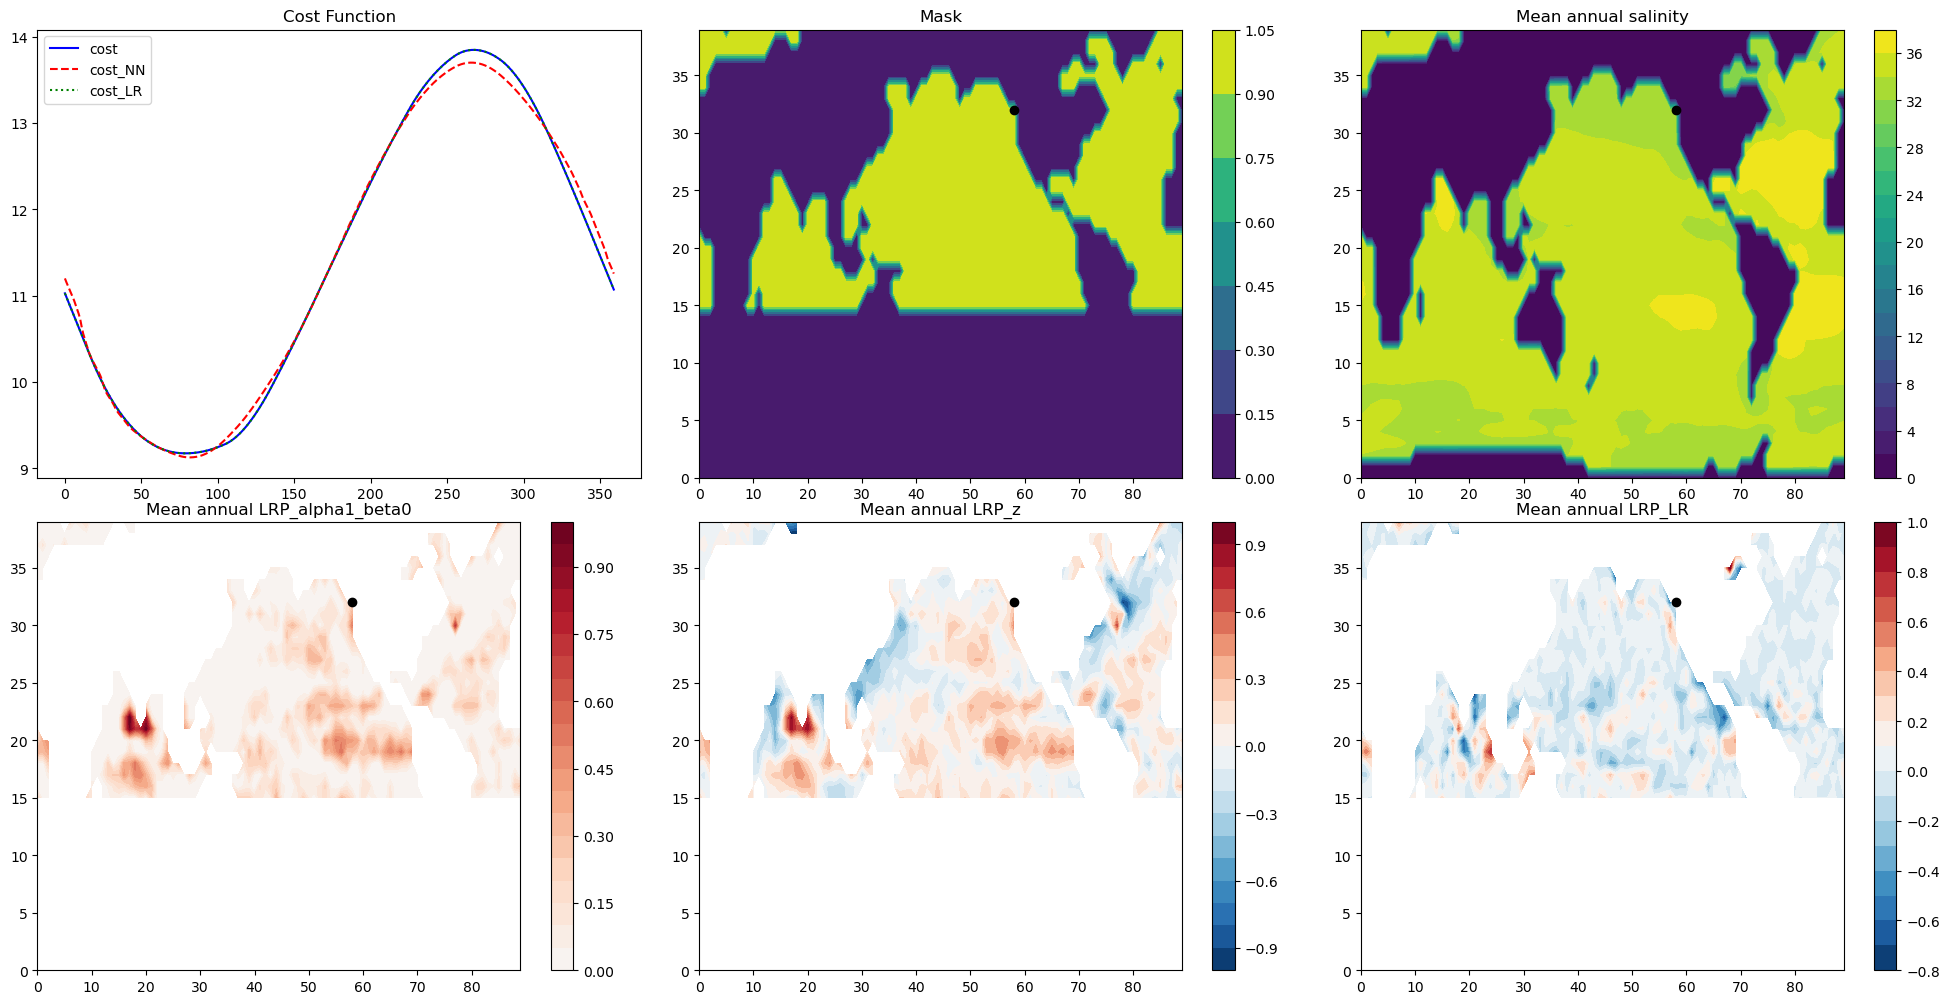

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[:360], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(saltSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual salinity')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### tauX and tauY

In [11]:
Layers = [{'size': tauWet.shape[1]   , 'activation': None    , 'use_bias': None},
          {'size': 40                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(tauWet, cost, 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 20, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(tauWet)

L = TrainLR(tauWet, cost, y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(tauWet)

Train on 28800 samples, validate on 7200 samples
Epoch 1/20
28670/28800 [============================>.] - ETA: 0s - loss: 1.0666 - mae: 0.2460
Epoch 1: val_loss improved from inf to 0.00054, saving model to /home/shreyas/XAIRT/examples/model.h5
28800/28800 [==============================] - 7s 230us/sample - loss: 1.0618 - mae: 0.2449 - val_loss: 5.4066e-04 - val_mae: 0.0175
Epoch 2/20
28660/28800 [============================>.] - ETA: 0s - loss: 6.9781e-04 - mae: 0.0206
Epoch 2: val_loss did not improve from 0.00054
28800/28800 [==============================] - 7s 241us/sample - loss: 7.0050e-04 - mae: 0.0207 - val_loss: 8.8474e-04 - val_mae: 0.0242
Epoch 3/20
28690/28800 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0298
Epoch 3: val_loss did not improve from 0.00054
28800/28800 [==============================] - 6s 202us/sample - loss: 0.0015 - mae: 0.0298 - val_loss: 0.0017 - val_mae: 0.0336
Epoch 4/20
28790/28800 [============================>.] - ETA: 0s -

In [12]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_a1b0[:,:,:,:] = np.nan
rel_a1b0[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_a1b0[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

X = XAIR(best_model, 'lrp.z', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_z[:,:,:,:] = np.nan
rel_z[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_z[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

XL = XLR(regr, tauWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_LR[:,:,:,:] = np.nan
rel_LR[0,:,wetpoints[0],wetpoints[1]] = a_LR[:,:len(wetpoints[0])].T
rel_LR[1,:,wetpoints[0],wetpoints[1]] = a_LR[:,len(wetpoints[0]):].T

Text(0.5, 1.0, 'Mean annual LRP_LR')

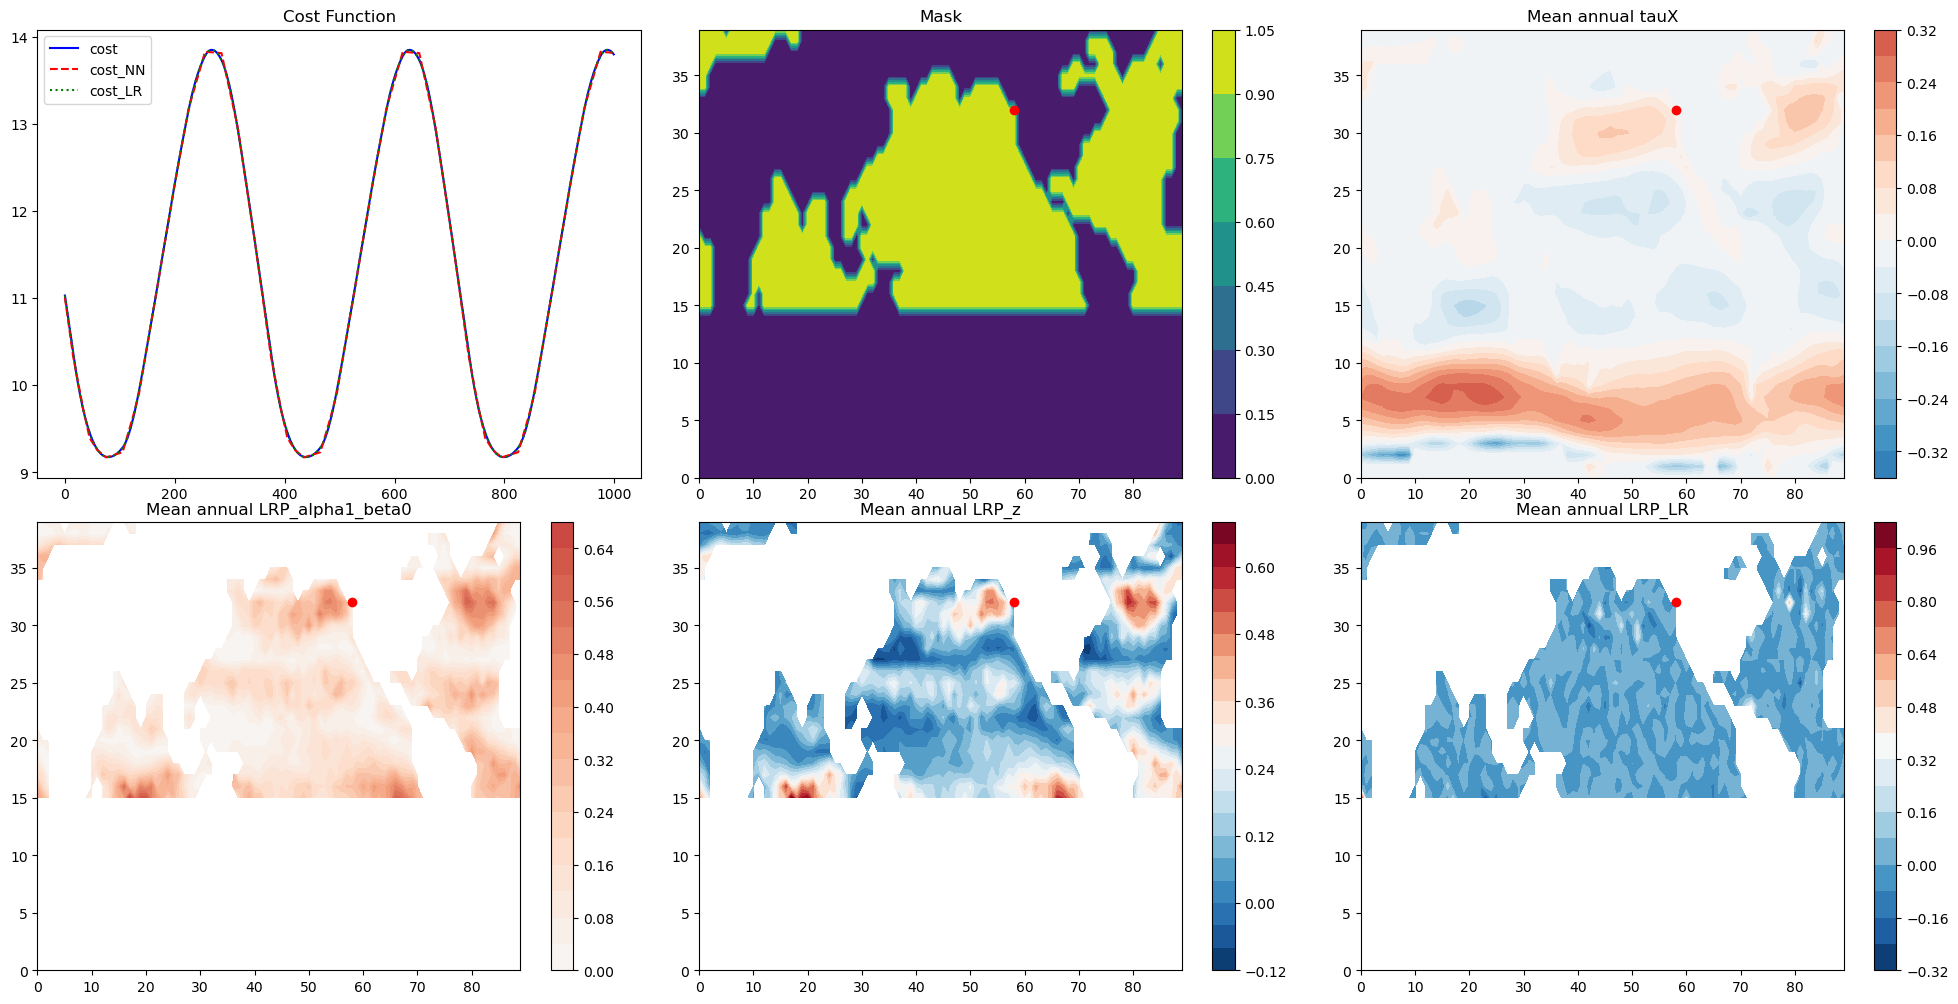

In [13]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[:360], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauX, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauX')

p = ax[1,0].contourf(np.mean(rel_a1b0[0], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

Text(0.5, 1.0, 'Mean annual LRP_LR')

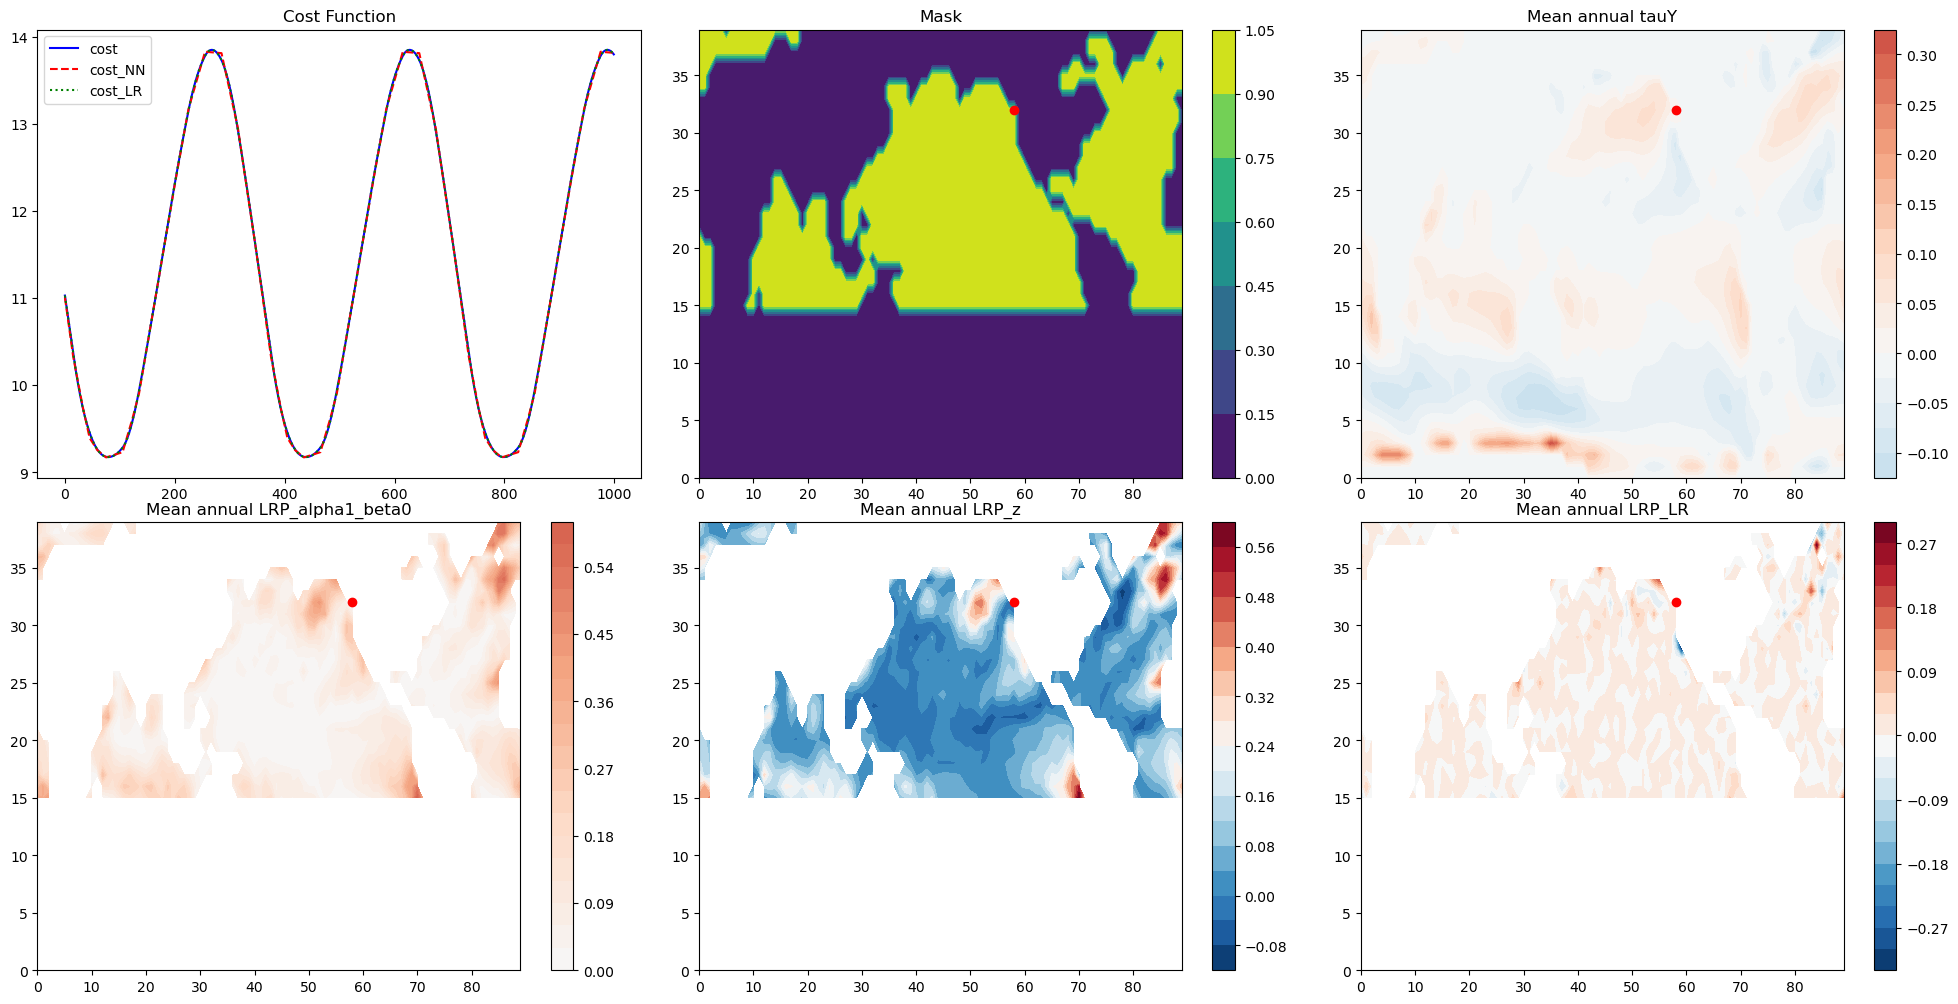

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[:360], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauY, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauY')

p = ax[1,0].contourf(np.mean(rel_a1b0[1], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

## 60 days before

### Theta

In [28]:
Layers = [{'size': thetaSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(thetaSurfWet[:-60], cost[60:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    100, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(thetaSurfWet)

L = TrainLR(thetaSurfWet[:-60], cost[60:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(thetaSurfWet)

Train on 28752 samples, validate on 7188 samples
Epoch 1/50
28200/28752 [============================>.] - ETA: 0s - loss: 12.4211 - mae: 0.9933
Epoch 1: val_loss improved from inf to 0.02413, saving model to /home/shreyas/XAIRT/examples/model.h5
28752/28752 [==============================] - 1s 41us/sample - loss: 12.1831 - mae: 0.9769 - val_loss: 0.0241 - val_mae: 0.1336
Epoch 2/50
28000/28752 [============================>.] - ETA: 0s - loss: 0.0185 - mae: 0.1091
Epoch 2: val_loss improved from 0.02413 to 0.01510, saving model to /home/shreyas/XAIRT/examples/model.h5
28752/28752 [==============================] - 1s 38us/sample - loss: 0.0184 - mae: 0.1088 - val_loss: 0.0151 - val_mae: 0.0950
Epoch 3/50
28500/28752 [============================>.] - ETA: 0s - loss: 0.0130 - mae: 0.0887
Epoch 3: val_loss improved from 0.01510 to 0.01095, saving model to /home/shreyas/XAIRT/examples/model.h5
28752/28752 [==============================] - 1s 37us/sample - loss: 0.0130 - mae: 0.0886 - v

Epoch 30/50
27000/28752 [===========================>..] - ETA: 0s - loss: 0.0970 - mae: 0.2352
Epoch 30: val_loss did not improve from 0.00269
28752/28752 [==============================] - 1s 32us/sample - loss: 0.0935 - mae: 0.2316 - val_loss: 0.0970 - val_mae: 0.3092
Epoch 31/50
27400/28752 [===========================>..] - ETA: 0s - loss: 0.0846 - mae: 0.2166
Epoch 31: val_loss did not improve from 0.00269
28752/28752 [==============================] - 1s 31us/sample - loss: 0.0819 - mae: 0.2132 - val_loss: 0.0034 - val_mae: 0.0486
Epoch 32/50
28700/28752 [============================>.] - ETA: 0s - loss: 0.0742 - mae: 0.1818
Epoch 32: val_loss did not improve from 0.00269
28752/28752 [==============================] - 1s 32us/sample - loss: 0.0741 - mae: 0.1817 - val_loss: 0.0345 - val_mae: 0.1819
Epoch 33/50
27300/28752 [===========================>..] - ETA: 0s - loss: 0.0737 - mae: 0.1992
Epoch 33: val_loss did not improve from 0.00269
28752/28752 [===========================

In [37]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, thetaSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

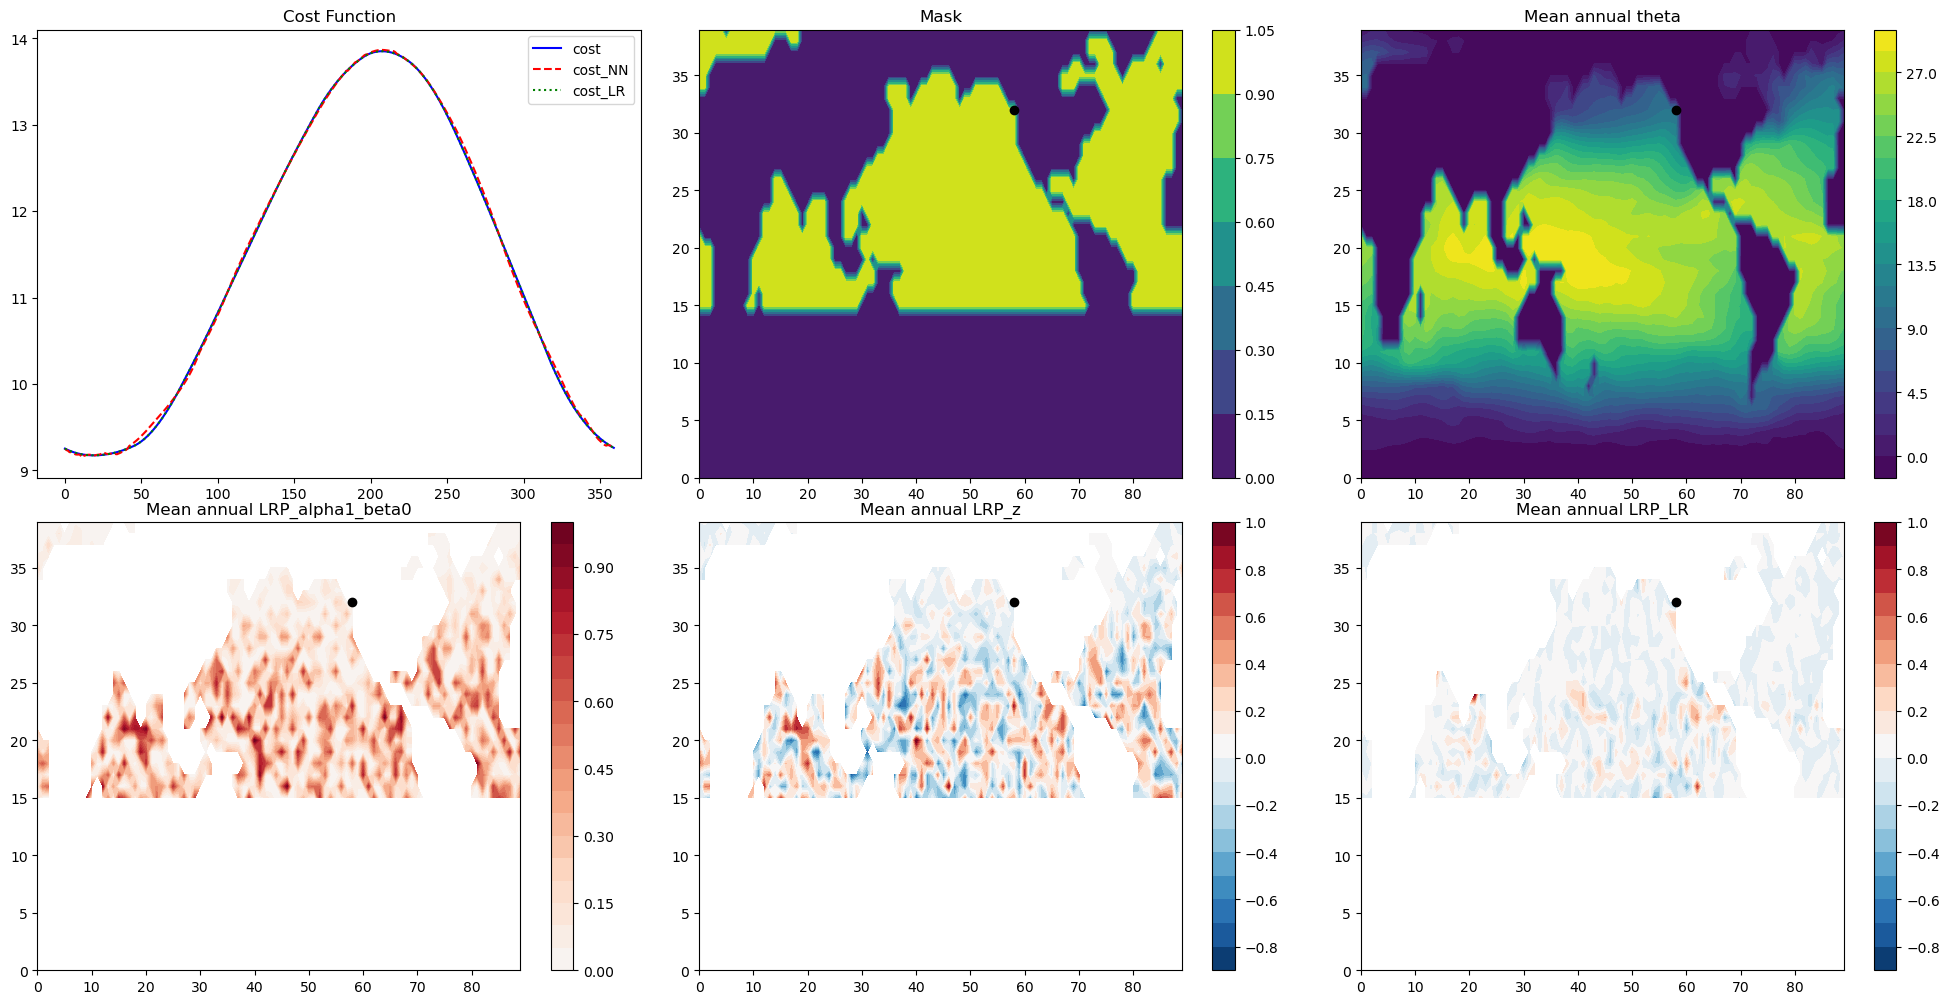

In [40]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[60:420], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(thetaSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual theta')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### Salinity

In [46]:
Layers = [{'size': saltSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(saltSurfWet[:-60], cost[60:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(saltSurfWet)

L = TrainLR(saltSurfWet[:-60], cost[60:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(saltSurfWet)

Train on 28752 samples, validate on 7188 samples
Epoch 1/50
28500/28752 [============================>.] - ETA: 0s - loss: 16.6323 - mae: 2.5449
Epoch 1: val_loss improved from inf to 30.93602, saving model to /home/shreyas/XAIRT/examples/model.h5
28752/28752 [==============================] - 4s 132us/sample - loss: 16.5439 - mae: 2.5410 - val_loss: 30.9360 - val_mae: 5.3513
Epoch 2/50
28660/28752 [============================>.] - ETA: 0s - loss: 7.6946 - mae: 2.2300
Epoch 2: val_loss did not improve from 30.93602
28752/28752 [==============================] - 4s 128us/sample - loss: 7.6951 - mae: 2.2305 - val_loss: 31.2877 - val_mae: 5.4160
Epoch 3/50
28670/28752 [============================>.] - ETA: 0s - loss: 5.2465 - mae: 1.8507
Epoch 3: val_loss improved from 30.93602 to 2.12565, saving model to /home/shreyas/XAIRT/examples/model.h5
28752/28752 [==============================] - 6s 217us/sample - loss: 5.2523 - mae: 1.8515 - val_loss: 2.1256 - val_mae: 1.2770
Epoch 4/50
28390/

28710/28752 [============================>.] - ETA: 0s - loss: 0.1126 - mae: 0.2663
Epoch 29: val_loss did not improve from 0.01473
28752/28752 [==============================] - 4s 137us/sample - loss: 0.1128 - mae: 0.2665 - val_loss: 0.1255 - val_mae: 0.3393
Epoch 30/50
28590/28752 [============================>.] - ETA: 0s - loss: 0.1078 - mae: 0.2646
Epoch 30: val_loss did not improve from 0.01473
28752/28752 [==============================] - 4s 146us/sample - loss: 0.1083 - mae: 0.2653 - val_loss: 0.2092 - val_mae: 0.4465
Epoch 31/50
28510/28752 [============================>.] - ETA: 0s - loss: 0.1074 - mae: 0.2623
Epoch 31: val_loss did not improve from 0.01473
28752/28752 [==============================] - 5s 159us/sample - loss: 0.1084 - mae: 0.2636 - val_loss: 0.3073 - val_mae: 0.5444
Epoch 32/50
28640/28752 [============================>.] - ETA: 0s - loss: 0.1062 - mae: 0.2602
Epoch 32: val_loss did not improve from 0.01473
28752/28752 [==============================] - 4s

In [47]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, saltSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

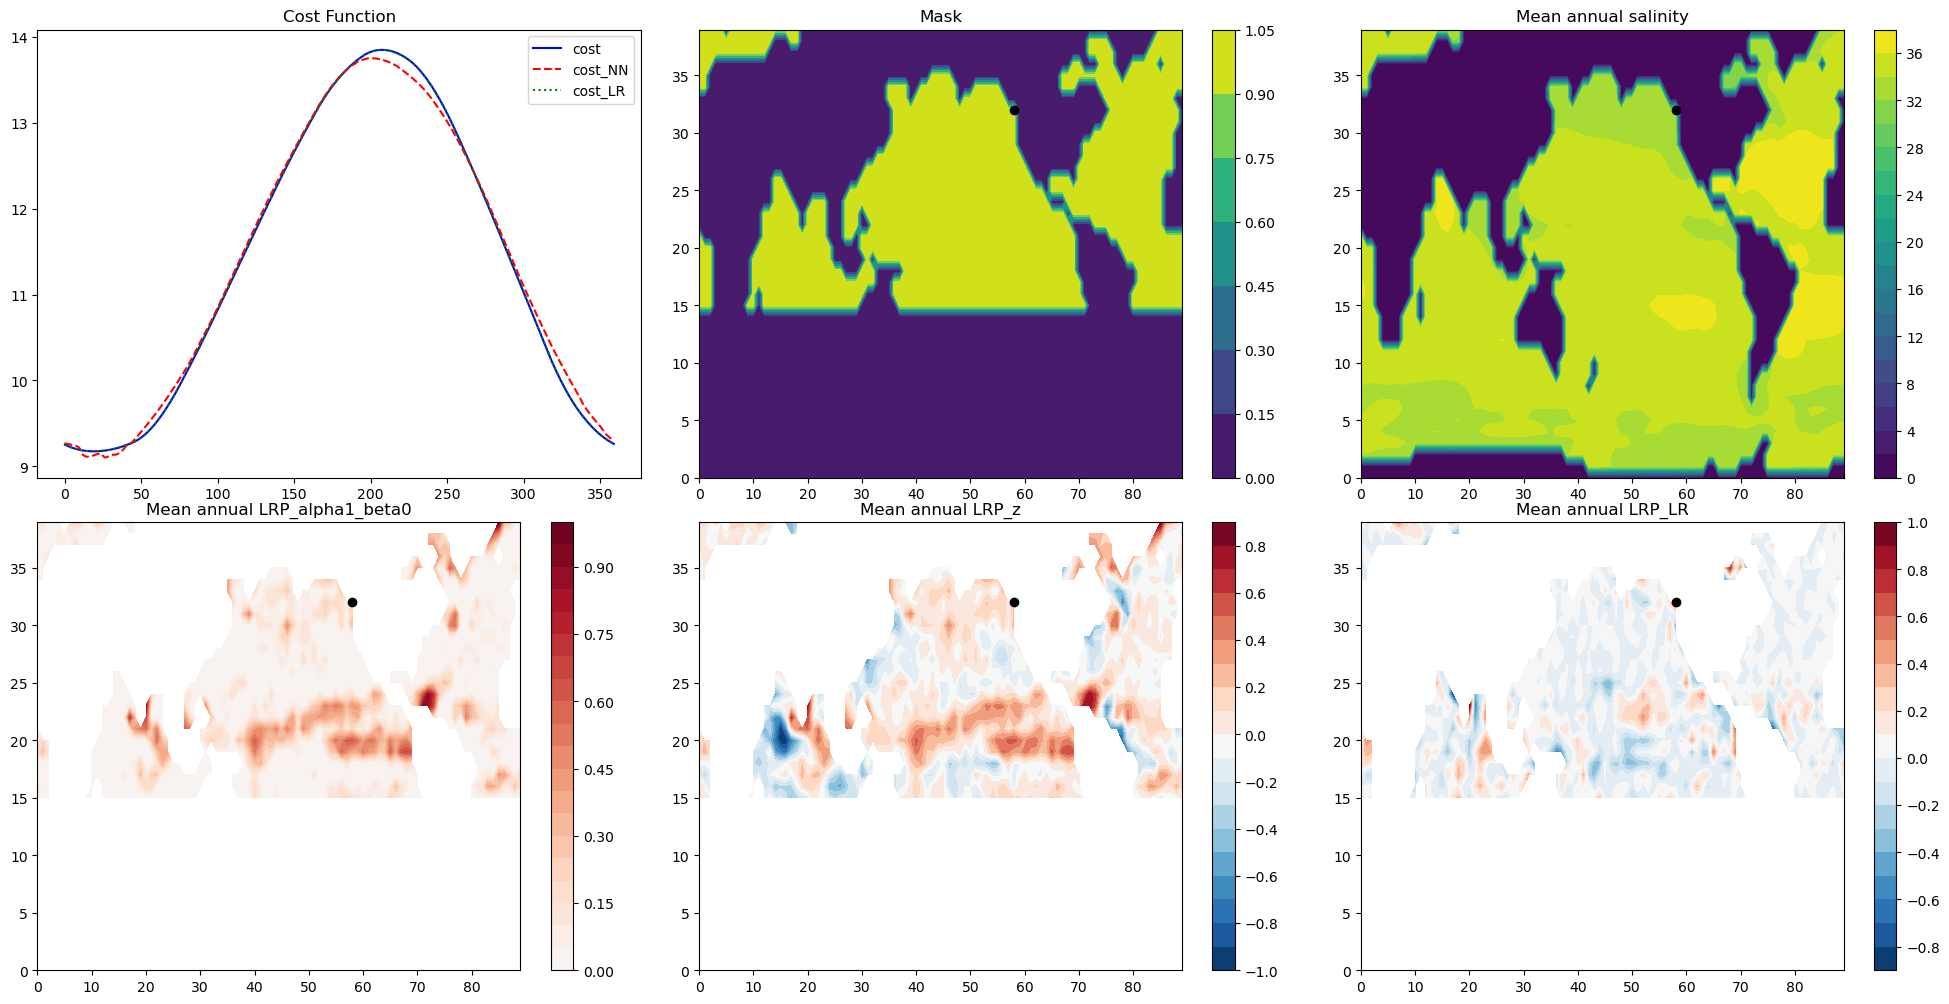

In [48]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[60:420], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(saltSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual salinity')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### tauX and tauY

In [49]:
Layers = [{'size': tauWet.shape[1]   , 'activation': None    , 'use_bias': None},
          {'size': 40                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(tauWet[:-60], cost[60:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 20, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(tauWet)

L = TrainLR(tauWet[:-60], cost[60:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(tauWet)

Train on 28752 samples, validate on 7188 samples
Epoch 1/20
28560/28752 [============================>.] - ETA: 0s - loss: 0.7322 - mae: 0.1640
Epoch 1: val_loss improved from inf to 0.00040, saving model to /home/shreyas/XAIRT/examples/model.h5
28752/28752 [==============================] - 7s 229us/sample - loss: 0.7273 - mae: 0.1630 - val_loss: 4.0160e-04 - val_mae: 0.0150
Epoch 2/20
28510/28752 [============================>.] - ETA: 0s - loss: 5.3860e-04 - mae: 0.0176
Epoch 2: val_loss did not improve from 0.00040
28752/28752 [==============================] - 7s 229us/sample - loss: 5.3686e-04 - mae: 0.0176 - val_loss: 4.0872e-04 - val_mae: 0.0161
Epoch 3/20
28440/28752 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0264
Epoch 3: val_loss did not improve from 0.00040
28752/28752 [==============================] - 6s 197us/sample - loss: 0.0013 - mae: 0.0265 - val_loss: 0.0031 - val_mae: 0.0500
Epoch 4/20
28690/28752 [============================>.] - ETA: 0s -

In [50]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_a1b0[:,:,:,:] = np.nan
rel_a1b0[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_a1b0[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

X = XAIR(best_model, 'lrp.z', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_z[:,:,:,:] = np.nan
rel_z[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_z[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

XL = XLR(regr, tauWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_LR[:,:,:,:] = np.nan
rel_LR[0,:,wetpoints[0],wetpoints[1]] = a_LR[:,:len(wetpoints[0])].T
rel_LR[1,:,wetpoints[0],wetpoints[1]] = a_LR[:,len(wetpoints[0]):].T

Text(0.5, 1.0, 'Mean annual LRP_LR')

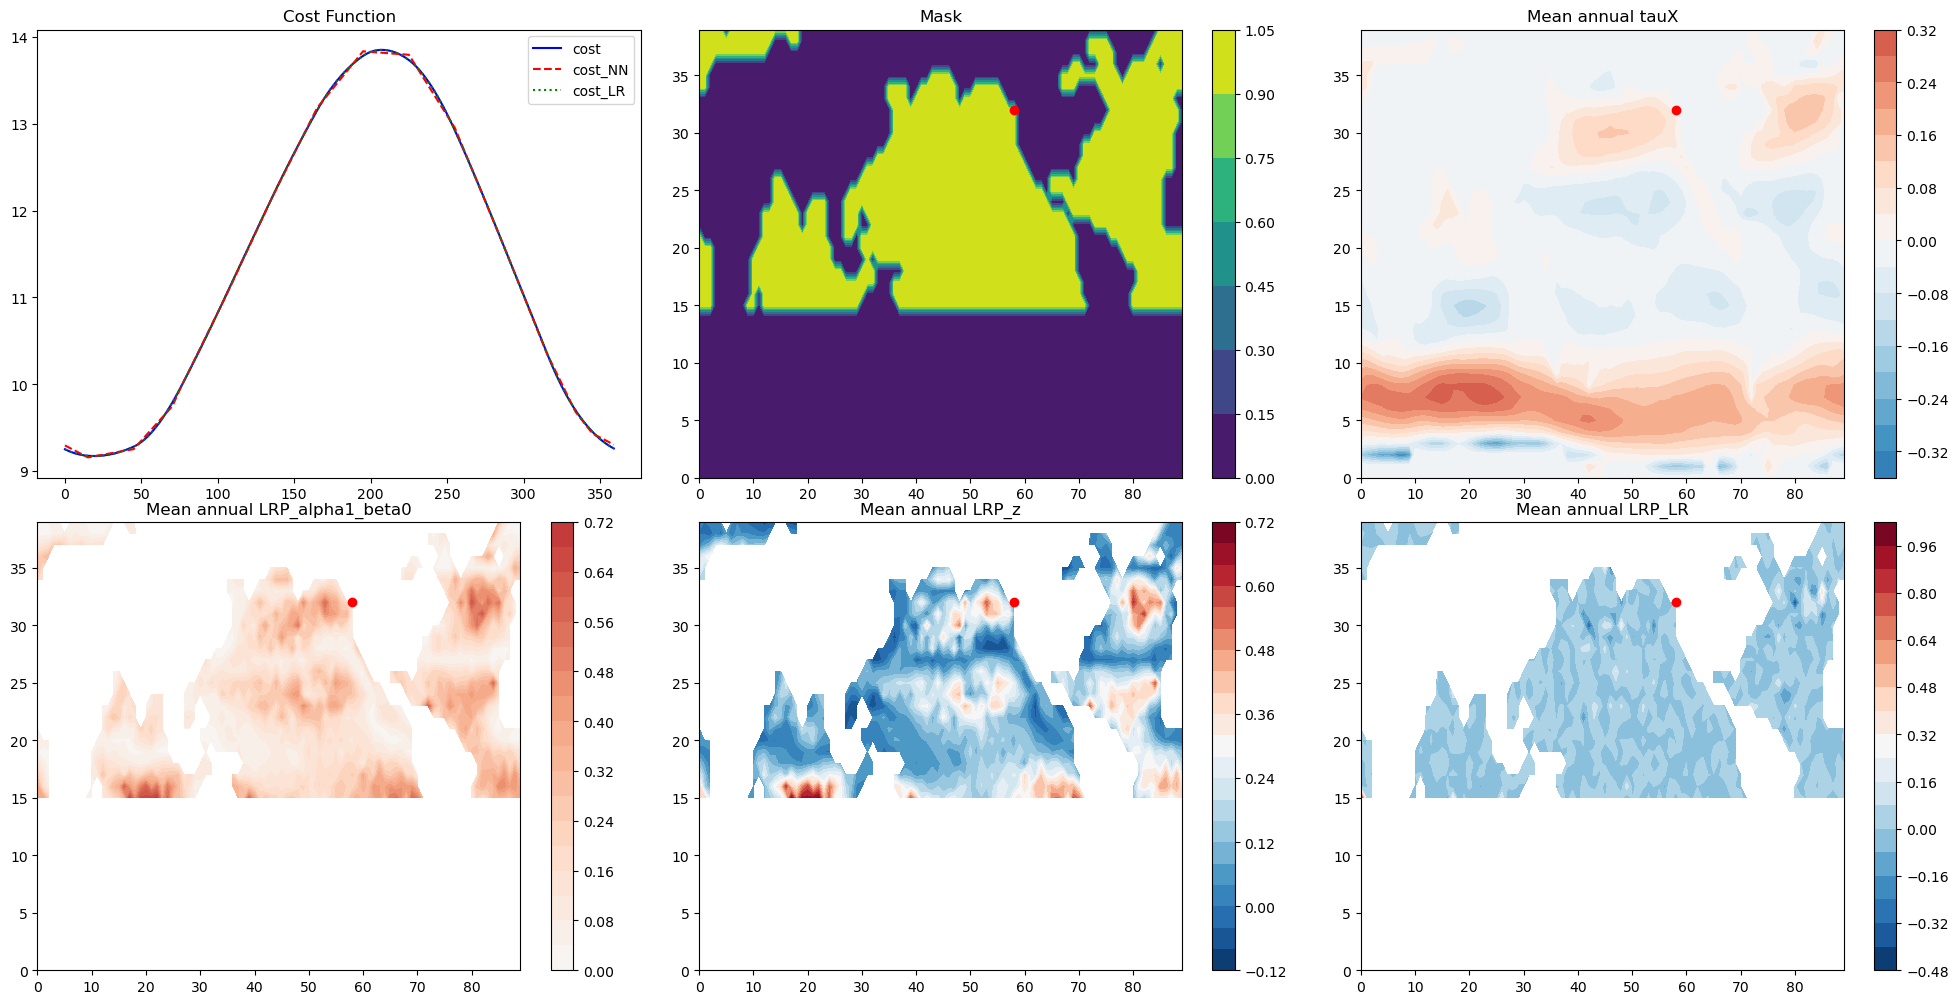

In [51]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[60:420], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauX, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauX')

p = ax[1,0].contourf(np.mean(rel_a1b0[0], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

Text(0.5, 1.0, 'Mean annual LRP_LR')

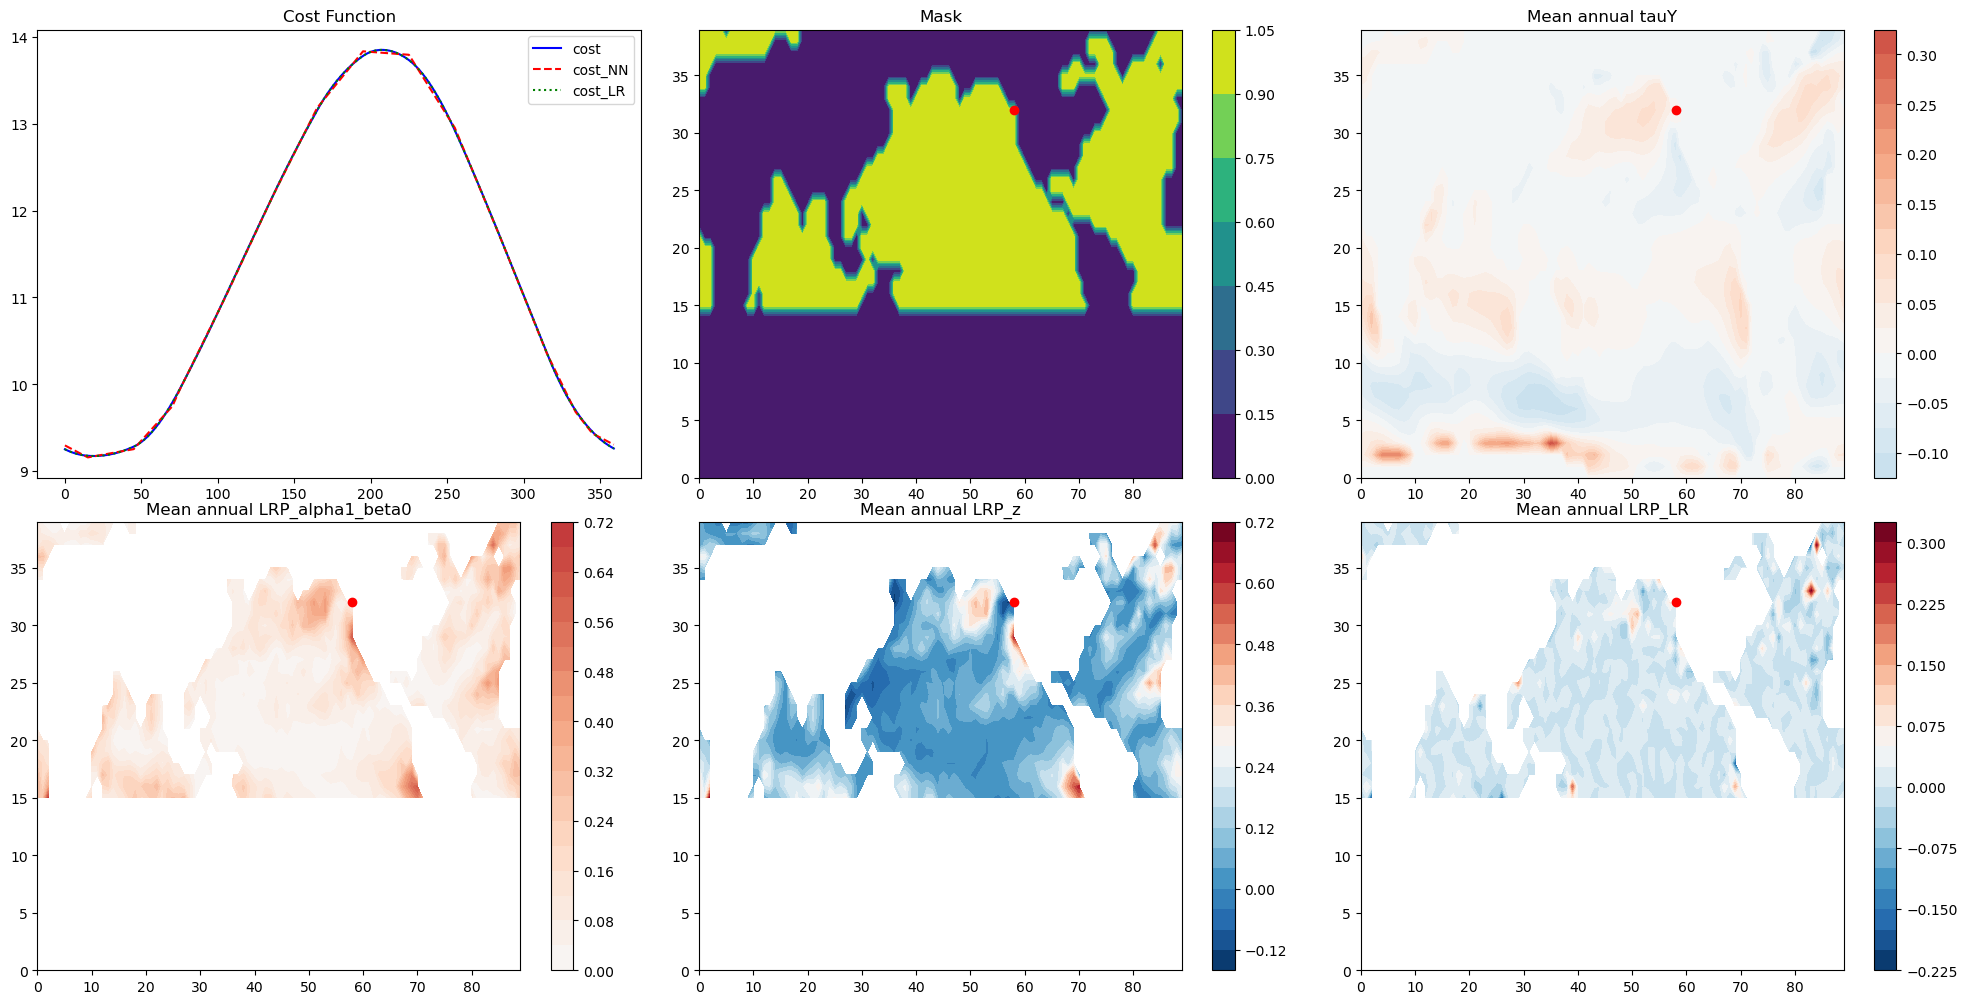

In [52]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[60:420], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauY, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauY')

p = ax[1,0].contourf(np.mean(rel_a1b0[1], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

## 120 days before

### Theta

In [53]:
Layers = [{'size': thetaSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(thetaSurfWet[:-120], cost[120:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    100, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(thetaSurfWet)

L = TrainLR(thetaSurfWet[:-120], cost[120:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(thetaSurfWet)

Train on 28704 samples, validate on 7176 samples
Epoch 1/50
28700/28704 [============================>.] - ETA: 0s - loss: 31.3389 - mae: 2.2754
Epoch 1: val_loss improved from inf to 0.31074, saving model to /home/shreyas/XAIRT/examples/model.h5
28704/28704 [==============================] - 1s 43us/sample - loss: 31.3345 - mae: 2.2751 - val_loss: 0.3107 - val_mae: 0.4633
Epoch 2/50
28500/28704 [============================>.] - ETA: 0s - loss: 0.1607 - mae: 0.3280
Epoch 2: val_loss improved from 0.31074 to 0.11432, saving model to /home/shreyas/XAIRT/examples/model.h5
28704/28704 [==============================] - 1s 35us/sample - loss: 0.1603 - mae: 0.3276 - val_loss: 0.1143 - val_mae: 0.2808
Epoch 3/50
28200/28704 [============================>.] - ETA: 0s - loss: 0.0987 - mae: 0.2658
Epoch 3: val_loss improved from 0.11432 to 0.08839, saving model to /home/shreyas/XAIRT/examples/model.h5
28704/28704 [==============================] - 1s 36us/sample - loss: 0.0984 - mae: 0.2655 - v

Epoch 29/50
27600/28704 [===========================>..] - ETA: 0s - loss: 0.1423 - mae: 0.3065
Epoch 29: val_loss did not improve from 0.00314
28704/28704 [==============================] - 1s 48us/sample - loss: 0.1384 - mae: 0.3014 - val_loss: 0.2048 - val_mae: 0.4496
Epoch 30/50
27200/28704 [===========================>..] - ETA: 0s - loss: 0.1877 - mae: 0.2786
Epoch 30: val_loss did not improve from 0.00314
28704/28704 [==============================] - 1s 43us/sample - loss: 0.1785 - mae: 0.2685 - val_loss: 0.0059 - val_mae: 0.0632
Epoch 31/50
27500/28704 [===========================>..] - ETA: 0s - loss: 0.0629 - mae: 0.1897
Epoch 31: val_loss did not improve from 0.00314
28704/28704 [==============================] - 1s 42us/sample - loss: 0.0738 - mae: 0.2042 - val_loss: 1.0044 - val_mae: 1.0005
Epoch 32/50
27500/28704 [===========================>..] - ETA: 0s - loss: 0.0979 - mae: 0.2384
Epoch 32: val_loss did not improve from 0.00314
28704/28704 [===========================

In [54]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, thetaSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

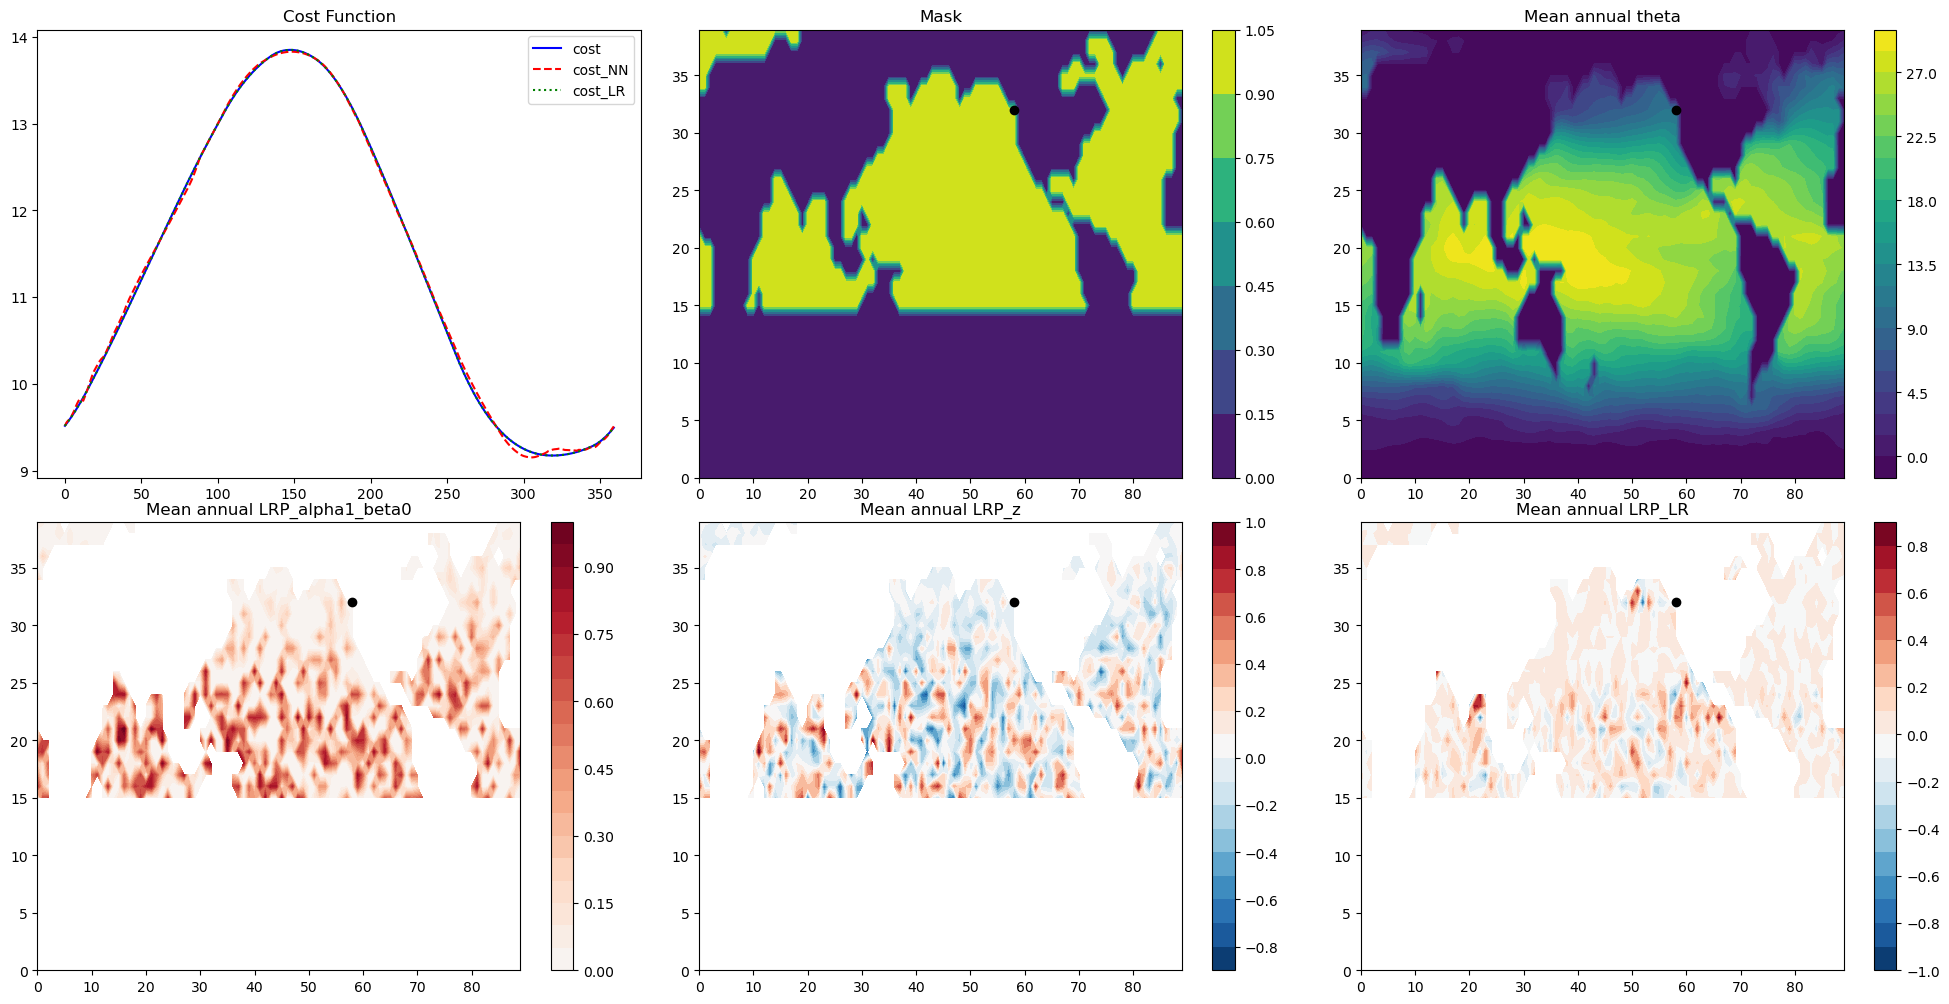

In [55]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[120:480], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(thetaSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual theta')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### Salinity

In [57]:
Layers = [{'size': saltSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(saltSurfWet[:-120], cost[120:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(saltSurfWet)

L = TrainLR(saltSurfWet[:-120], cost[120:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(saltSurfWet)

Train on 28704 samples, validate on 7176 samples
Epoch 1/50
28590/28704 [============================>.] - ETA: 0s - loss: 11.1101 - mae: 2.2248
Epoch 1: val_loss improved from inf to 7.97664, saving model to /home/shreyas/XAIRT/examples/model.h5
28704/28704 [==============================] - 6s 205us/sample - loss: 11.0810 - mae: 2.2223 - val_loss: 7.9766 - val_mae: 2.4262
Epoch 2/50
28620/28704 [============================>.] - ETA: 0s - loss: 5.2056 - mae: 1.8358
Epoch 2: val_loss did not improve from 7.97664
28704/28704 [==============================] - 6s 213us/sample - loss: 5.2099 - mae: 1.8367 - val_loss: 26.8482 - val_mae: 5.0256
Epoch 3/50
28450/28704 [============================>.] - ETA: 0s - loss: 3.9589 - mae: 1.6087
Epoch 3: val_loss improved from 7.97664 to 1.75537, saving model to /home/shreyas/XAIRT/examples/model.h5
28704/28704 [==============================] - 6s 197us/sample - loss: 3.9470 - mae: 1.6068 - val_loss: 1.7554 - val_mae: 1.1918
Epoch 4/50
28410/2870

28704/28704 [==============================] - 5s 183us/sample - loss: 0.1442 - mae: 0.3036 - val_loss: 0.5033 - val_mae: 0.6828
Epoch 29/50
28610/28704 [============================>.] - ETA: 0s - loss: 0.1349 - mae: 0.2946
Epoch 29: val_loss did not improve from 0.04935
28704/28704 [==============================] - 5s 168us/sample - loss: 0.1347 - mae: 0.2942 - val_loss: 0.3962 - val_mae: 0.6048
Epoch 30/50
28600/28704 [============================>.] - ETA: 0s - loss: 0.1435 - mae: 0.3042
Epoch 30: val_loss did not improve from 0.04935
28704/28704 [==============================] - 5s 186us/sample - loss: 0.1434 - mae: 0.3042 - val_loss: 0.0781 - val_mae: 0.2294
Epoch 31/50
28440/28704 [============================>.] - ETA: 0s - loss: 0.1262 - mae: 0.2814
Epoch 31: val_loss did not improve from 0.04935
28704/28704 [==============================] - 5s 188us/sample - loss: 0.1261 - mae: 0.2814 - val_loss: 0.1757 - val_mae: 0.3845
Epoch 32/50
28680/28704 [===========================

In [58]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, saltSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

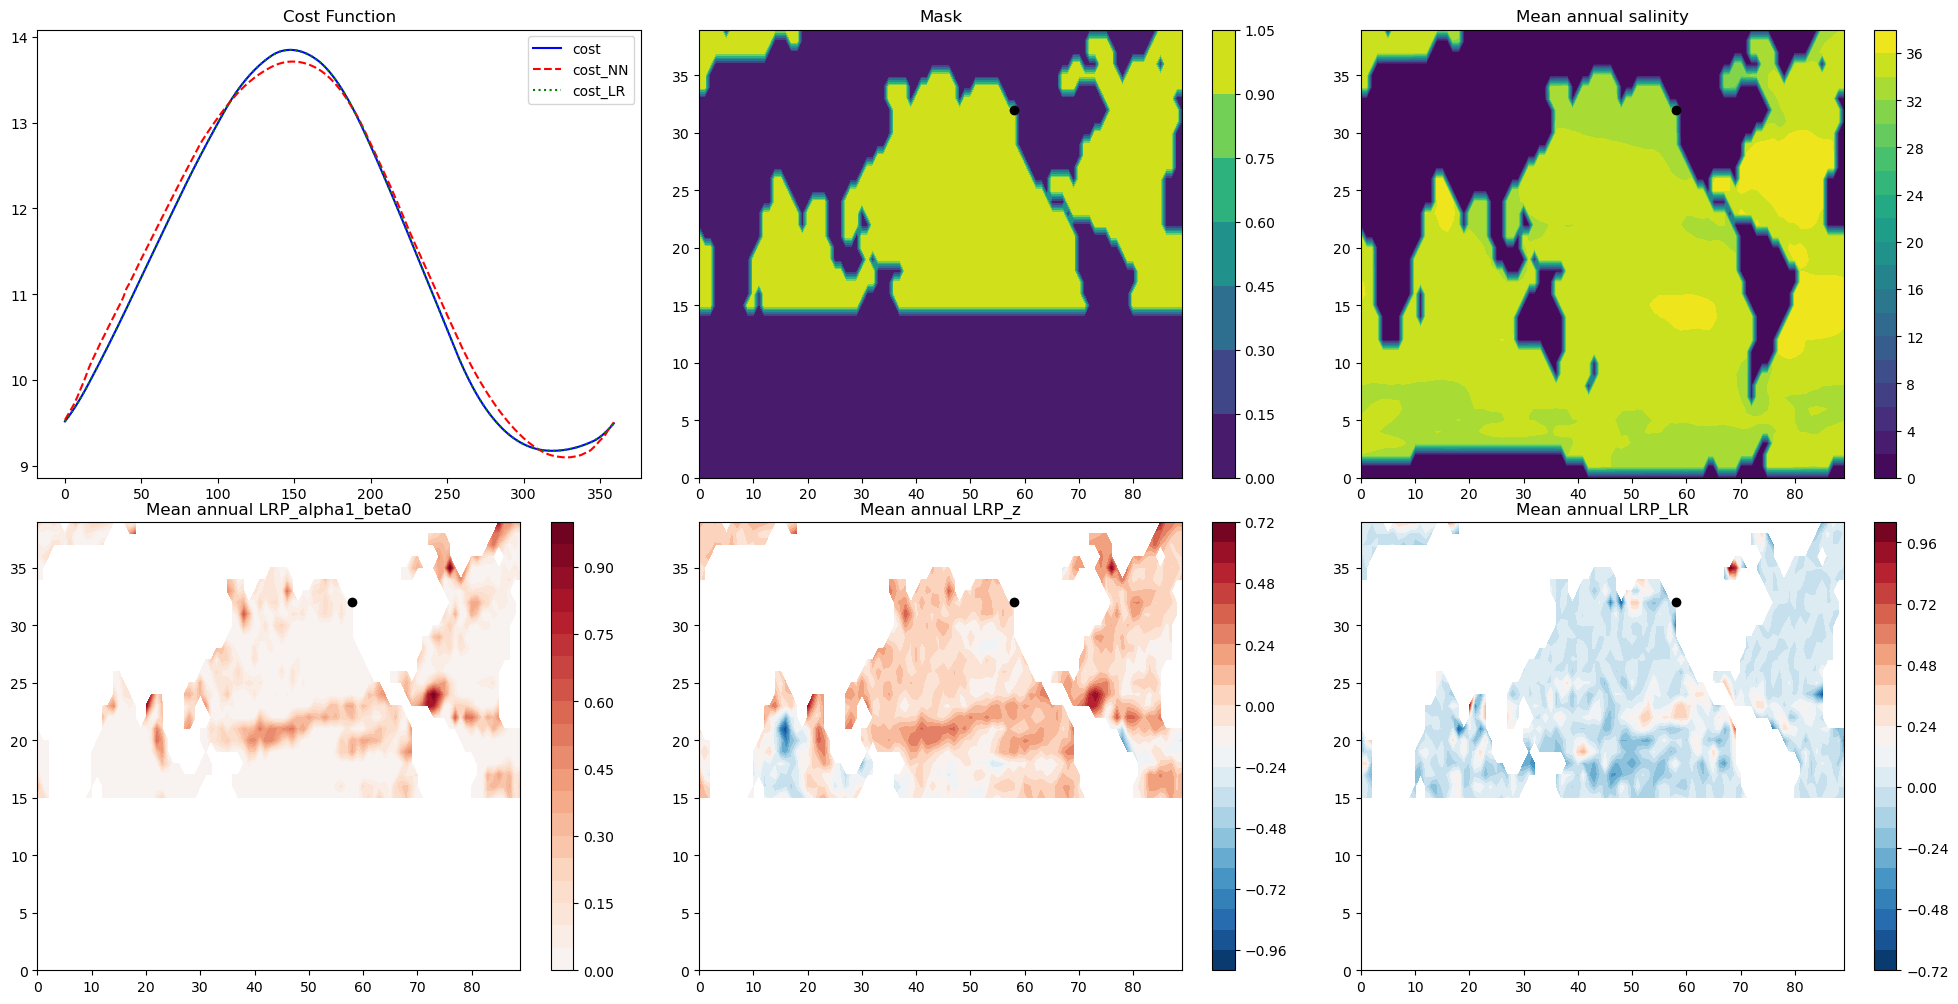

In [59]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[120:480], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(saltSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual salinity')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### tauX and tauY

In [60]:
Layers = [{'size': tauWet.shape[1]   , 'activation': None    , 'use_bias': None},
          {'size': 40                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(tauWet[:-120], cost[120:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 20, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(tauWet)

L = TrainLR(tauWet[:-120], cost[120:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(tauWet)

Train on 28704 samples, validate on 7176 samples
Epoch 1/20
28700/28704 [============================>.] - ETA: 0s - loss: 0.9961 - mae: 0.2460
Epoch 1: val_loss improved from inf to 0.00058, saving model to /home/shreyas/XAIRT/examples/model.h5
28704/28704 [==============================] - 7s 228us/sample - loss: 0.9960 - mae: 0.2459 - val_loss: 5.8459e-04 - val_mae: 0.0191
Epoch 2/20
28560/28704 [============================>.] - ETA: 0s - loss: 6.9066e-04 - mae: 0.0206
Epoch 2: val_loss did not improve from 0.00058
28704/28704 [==============================] - 6s 221us/sample - loss: 6.9068e-04 - mae: 0.0206 - val_loss: 8.3253e-04 - val_mae: 0.0232
Epoch 3/20
28590/28704 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0292
Epoch 3: val_loss did not improve from 0.00058
28704/28704 [==============================] - 6s 206us/sample - loss: 0.0014 - mae: 0.0292 - val_loss: 0.0026 - val_mae: 0.0450
Epoch 4/20
28650/28704 [============================>.] - ETA: 0s -

In [61]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_a1b0[:,:,:,:] = np.nan
rel_a1b0[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_a1b0[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

X = XAIR(best_model, 'lrp.z', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_z[:,:,:,:] = np.nan
rel_z[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_z[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

XL = XLR(regr, tauWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_LR[:,:,:,:] = np.nan
rel_LR[0,:,wetpoints[0],wetpoints[1]] = a_LR[:,:len(wetpoints[0])].T
rel_LR[1,:,wetpoints[0],wetpoints[1]] = a_LR[:,len(wetpoints[0]):].T

Text(0.5, 1.0, 'Mean annual LRP_LR')

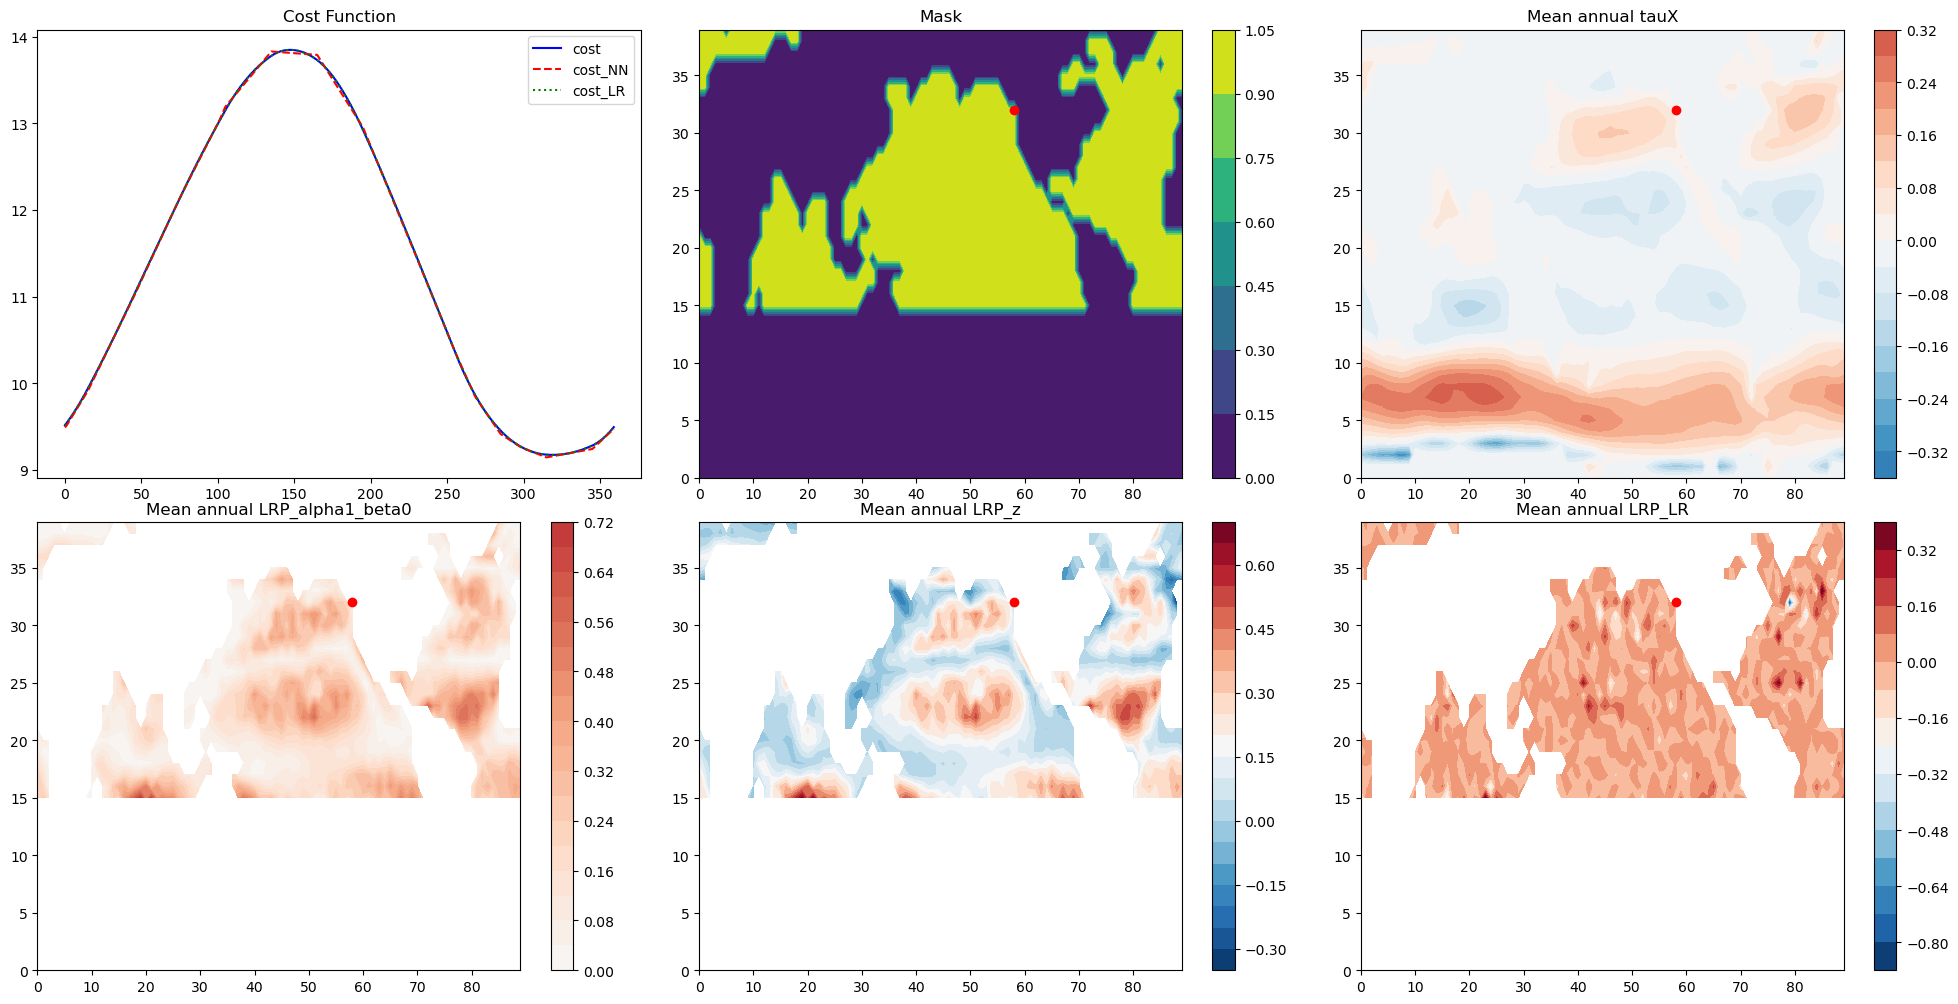

In [62]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[120:480], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauX, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauX')

p = ax[1,0].contourf(np.mean(rel_a1b0[0], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

Text(0.5, 1.0, 'Mean annual LRP_LR')

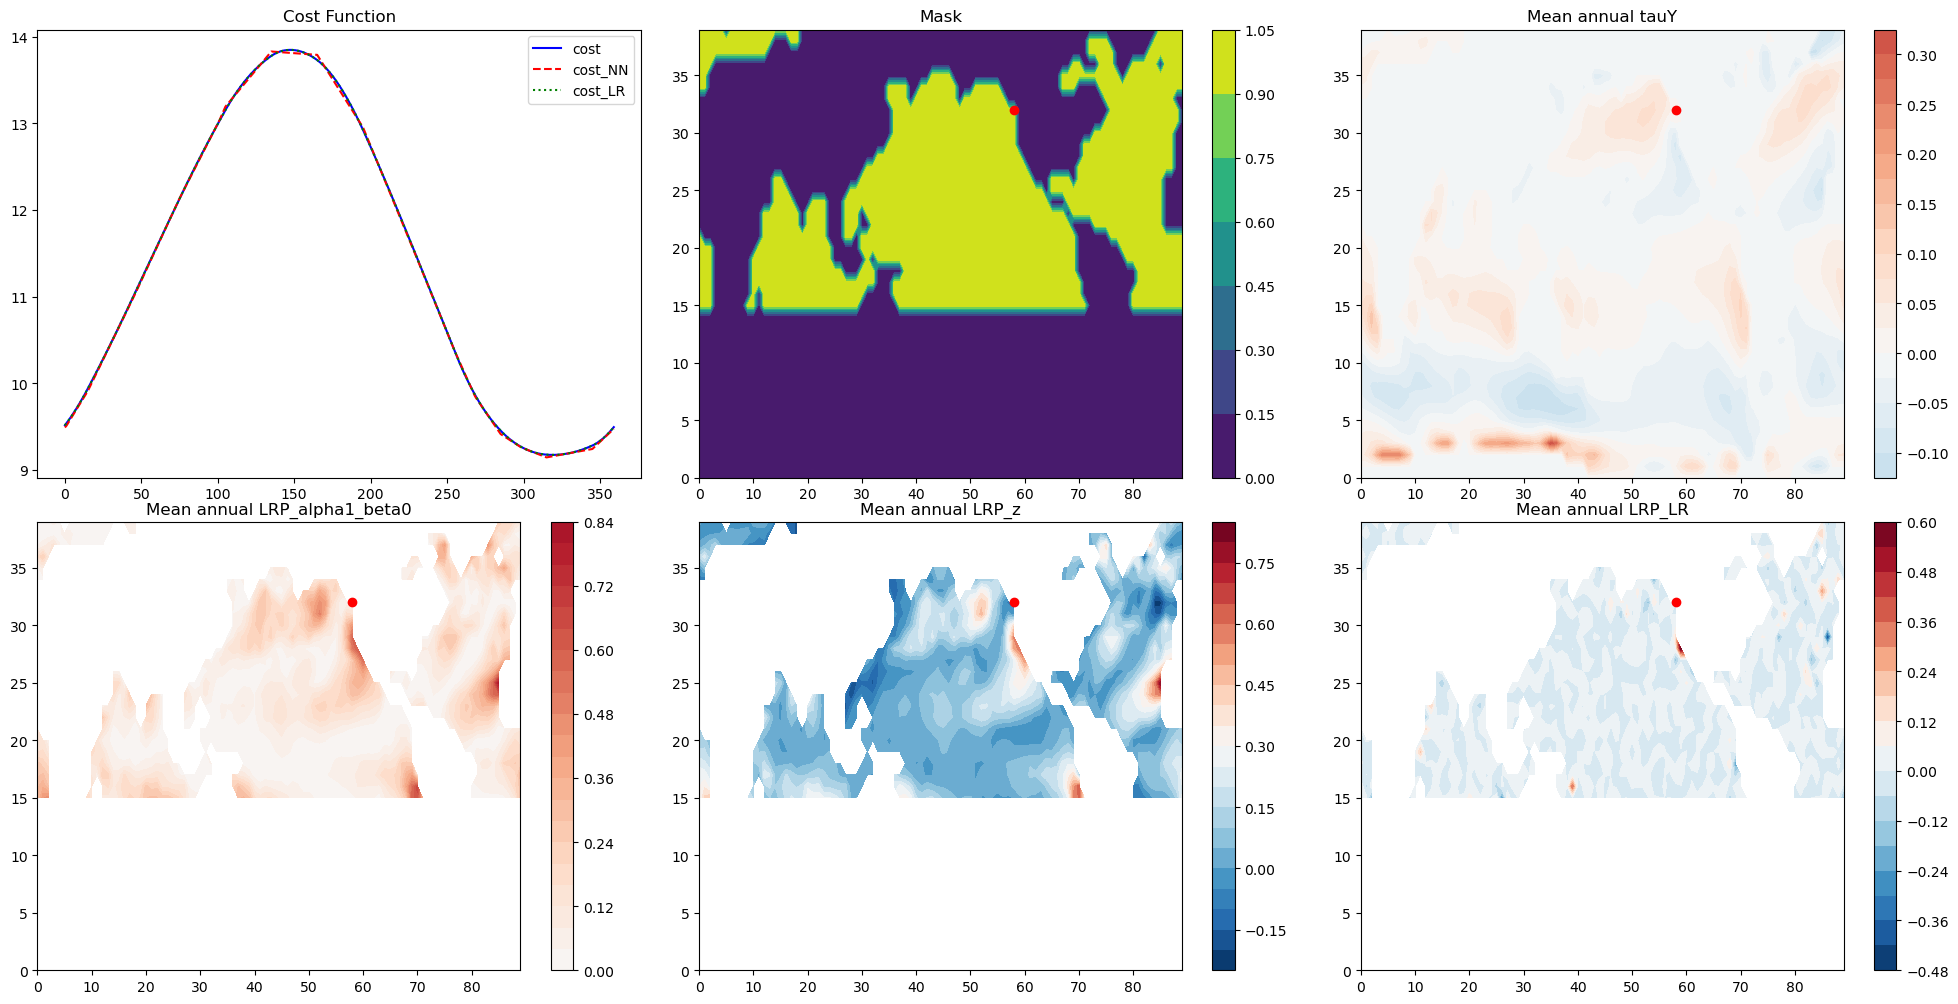

In [63]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[120:480], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauY, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauY')

p = ax[1,0].contourf(np.mean(rel_a1b0[1], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

## 180 days before

### Theta

In [64]:
Layers = [{'size': thetaSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(thetaSurfWet[:-180], cost[180:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    100, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(thetaSurfWet)

L = TrainLR(thetaSurfWet[:-180], cost[180:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(thetaSurfWet)

Train on 28656 samples, validate on 7164 samples
Epoch 1/50
27800/28656 [============================>.] - ETA: 0s - loss: 20.3204 - mae: 1.4878
Epoch 1: val_loss improved from inf to 0.12742, saving model to /home/shreyas/XAIRT/examples/model.h5
28656/28656 [==============================] - 1s 48us/sample - loss: 19.7171 - mae: 1.4522 - val_loss: 0.1274 - val_mae: 0.3124
Epoch 2/50
27900/28656 [============================>.] - ETA: 0s - loss: 0.0677 - mae: 0.2226
Epoch 2: val_loss improved from 0.12742 to 0.03366, saving model to /home/shreyas/XAIRT/examples/model.h5
28656/28656 [==============================] - 1s 49us/sample - loss: 0.0668 - mae: 0.2209 - val_loss: 0.0337 - val_mae: 0.1574
Epoch 3/50
28500/28656 [============================>.] - ETA: 0s - loss: 0.0259 - mae: 0.1338
Epoch 3: val_loss improved from 0.03366 to 0.01879, saving model to /home/shreyas/XAIRT/examples/model.h5
28656/28656 [==============================] - 1s 48us/sample - loss: 0.0259 - mae: 0.1336 - v

27700/28656 [===========================>..] - ETA: 0s - loss: 0.0831 - mae: 0.1822
Epoch 29: val_loss did not improve from 0.00242
28656/28656 [==============================] - 1s 33us/sample - loss: 0.0821 - mae: 0.1832 - val_loss: 0.0802 - val_mae: 0.2805
Epoch 30/50
27100/28656 [===========================>..] - ETA: 0s - loss: 0.1089 - mae: 0.2153
Epoch 30: val_loss did not improve from 0.00242
28656/28656 [==============================] - 1s 34us/sample - loss: 0.1100 - mae: 0.2206 - val_loss: 0.0705 - val_mae: 0.2624
Epoch 31/50
28400/28656 [============================>.] - ETA: 0s - loss: 0.0701 - mae: 0.1469
Epoch 31: val_loss did not improve from 0.00242
28656/28656 [==============================] - 1s 34us/sample - loss: 0.0695 - mae: 0.1459 - val_loss: 0.0129 - val_mae: 0.1092
Epoch 32/50
27000/28656 [===========================>..] - ETA: 0s - loss: 0.0325 - mae: 0.1169
Epoch 32: val_loss did not improve from 0.00242
28656/28656 [==============================] - 1s 32

In [65]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', thetaSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, thetaSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, thetaSurf.shape[1], thetaSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

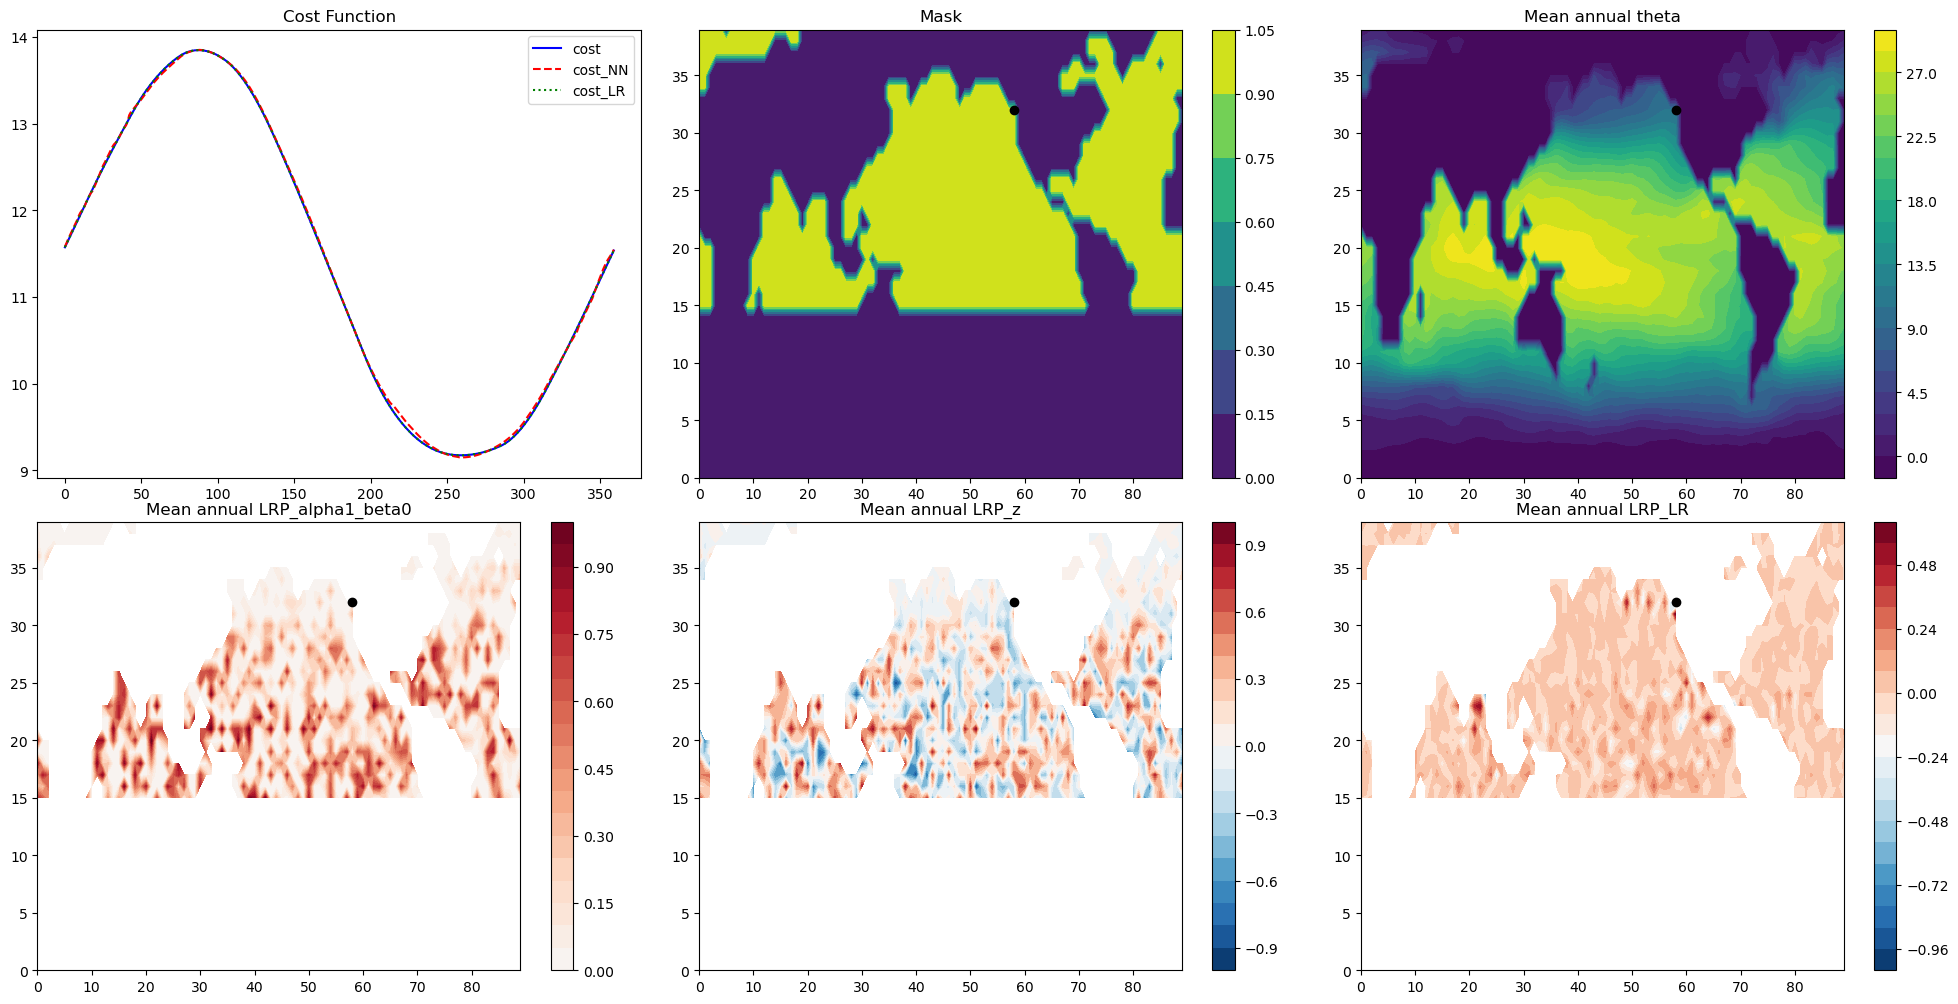

In [66]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[180:540], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(thetaSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual theta')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### Salinity

In [67]:
Layers = [{'size': saltSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(saltSurfWet[:-180], cost[180:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 50, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(saltSurfWet)

L = TrainLR(saltSurfWet[:-180], cost[180:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(saltSurfWet)

Train on 28656 samples, validate on 7164 samples
Epoch 1/50
28370/28656 [============================>.] - ETA: 0s - loss: 19.8476 - mae: 2.3509
Epoch 1: val_loss improved from inf to 11.02902, saving model to /home/shreyas/XAIRT/examples/model.h5
28656/28656 [==============================] - 5s 179us/sample - loss: 19.6873 - mae: 2.3435 - val_loss: 11.0290 - val_mae: 3.0396
Epoch 2/50
28410/28656 [============================>.] - ETA: 0s - loss: 6.2865 - mae: 1.9987
Epoch 2: val_loss did not improve from 11.02902
28656/28656 [==============================] - 5s 172us/sample - loss: 6.2918 - mae: 2.0010 - val_loss: 11.5703 - val_mae: 3.2283
Epoch 3/50
28600/28656 [============================>.] - ETA: 0s - loss: 3.7866 - mae: 1.5624
Epoch 3: val_loss improved from 11.02902 to 5.93224, saving model to /home/shreyas/XAIRT/examples/model.h5
28656/28656 [==============================] - 5s 166us/sample - loss: 3.7917 - mae: 1.5639 - val_loss: 5.9322 - val_mae: 2.2276
Epoch 4/50
28320/

Epoch 28/50
28450/28656 [============================>.] - ETA: 0s - loss: 0.1319 - mae: 0.2901
Epoch 28: val_loss did not improve from 0.04359
28656/28656 [==============================] - 4s 134us/sample - loss: 0.1313 - mae: 0.2894 - val_loss: 0.0579 - val_mae: 0.1978
Epoch 29/50
28320/28656 [============================>.] - ETA: 0s - loss: 0.1223 - mae: 0.2783
Epoch 29: val_loss did not improve from 0.04359
28656/28656 [==============================] - 4s 127us/sample - loss: 0.1218 - mae: 0.2778 - val_loss: 0.2912 - val_mae: 0.5124
Epoch 30/50
28470/28656 [============================>.] - ETA: 0s - loss: 0.1204 - mae: 0.2779
Epoch 30: val_loss did not improve from 0.04359
28656/28656 [==============================] - 4s 138us/sample - loss: 0.1204 - mae: 0.2779 - val_loss: 0.1642 - val_mae: 0.3690
Epoch 31/50
28530/28656 [============================>.] - ETA: 0s - loss: 0.1183 - mae: 0.2758
Epoch 31: val_loss did not improve from 0.04359
28656/28656 [========================

In [68]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_a1b0[:,:,:] = np.nan
rel_a1b0[:,wetpoints[0],wetpoints[1]] = a

X = XAIR(best_model, 'lrp.z', 'classic', saltSurfWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_z[:,:,:] = np.nan
rel_z[:,wetpoints[0],wetpoints[1]] = a

XL = XLR(regr, saltSurfWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((num_rel, saltSurf.shape[1], saltSurf.shape[2]))
rel_LR[:,:,:] = np.nan
rel_LR[:,wetpoints[0],wetpoints[1]] = a_LR

Text(0.5, 1.0, 'Mean annual LRP_LR')

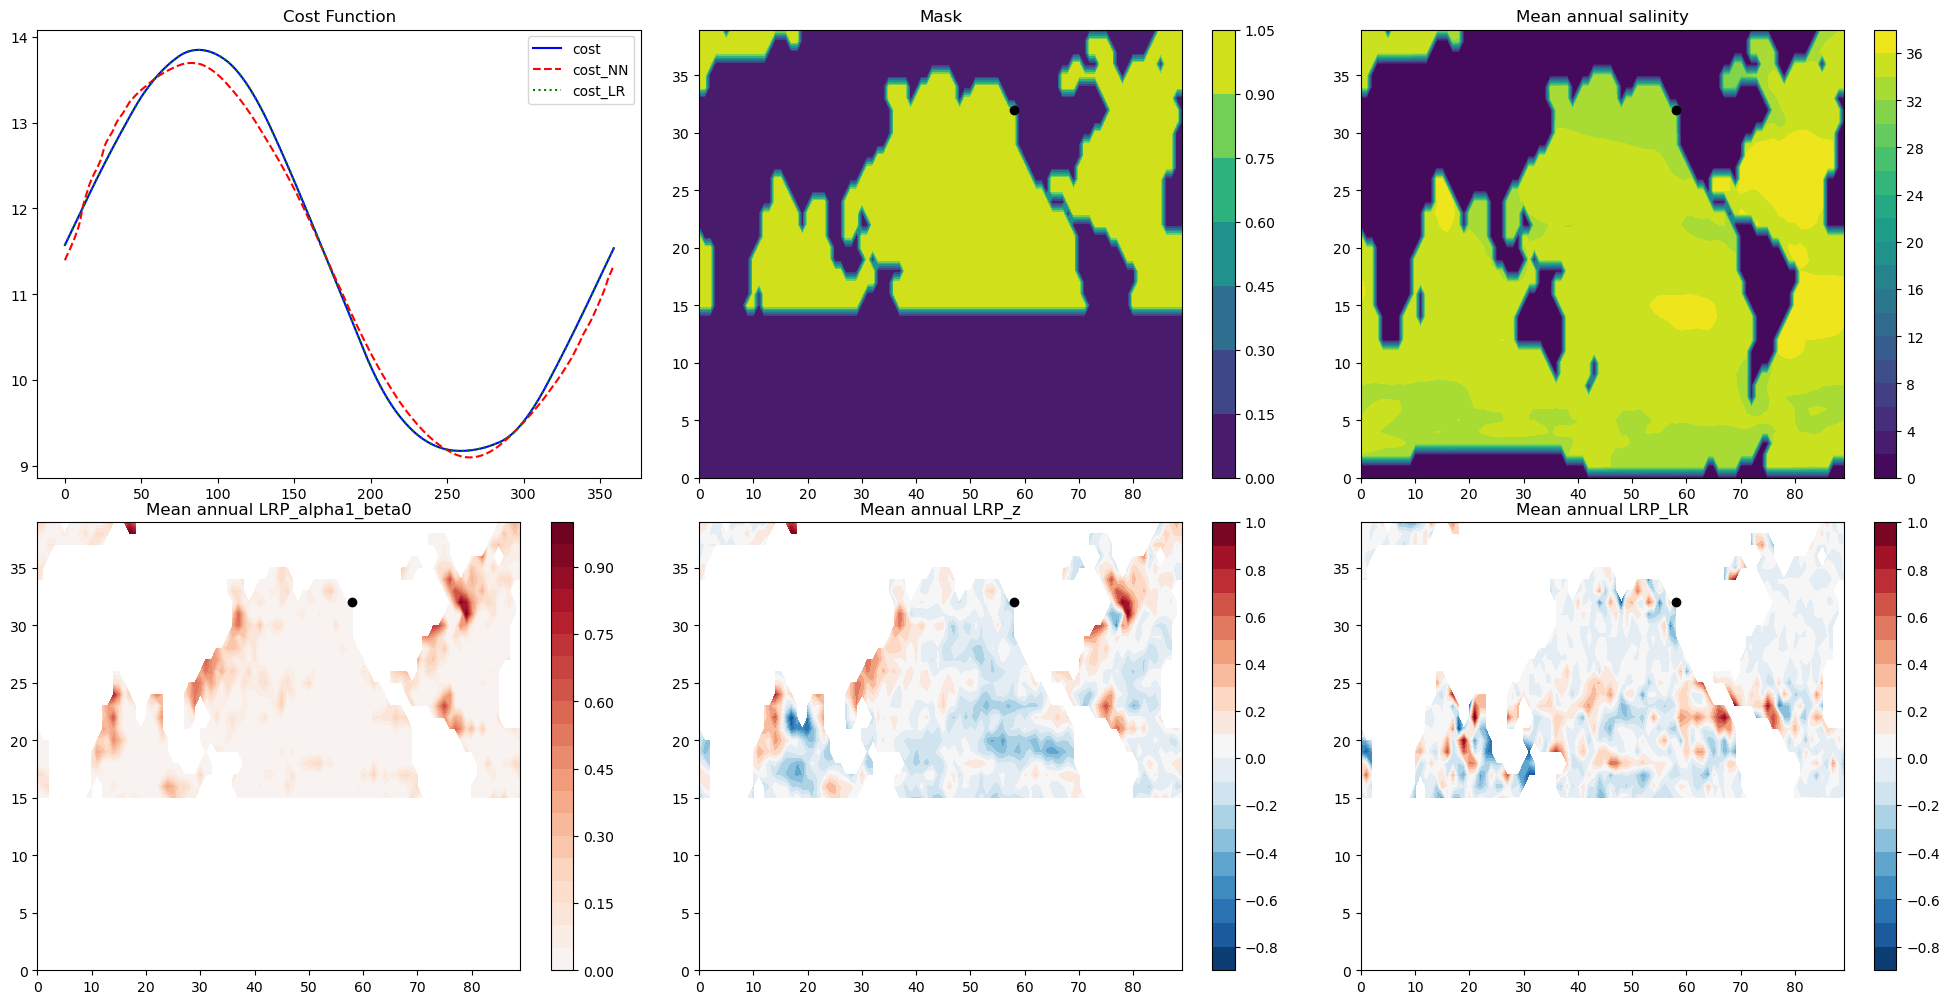

In [69]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[180:540], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(saltSurf, axis = 0), levels = 20)
ax[0,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual salinity')

p = ax[1,0].contourf(np.mean(rel_a1b0, axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR, axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'black')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

### tauX and tauY

In [70]:
Layers = [{'size': tauWet.shape[1]   , 'activation': None    , 'use_bias': None},
          {'size': 40                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 1                    , 'activation': 'linear', 'use_bias': False}]
Losses = [{'kind': 'mse', 'weight': 1.0}]

K = TrainFullyConnectedNN(tauWet[:-180], cost[180:], 
                    Layers, Losses,
                    'adam', ['mae'], 
                    10, 20, 0.2, 
                    'model', os.path.abspath(''))

best_model = K.quickTrain()
cost_predict = best_model.predict(tauWet)

L = TrainLR(tauWet[:-180], cost[180:], y_ref = 0.0, fit_intercept = False)
regr = L.quickTrain()

cost_predict_LR = regr.predict(tauWet)

Train on 28656 samples, validate on 7164 samples
Epoch 1/20
28480/28656 [============================>.] - ETA: 0s - loss: 0.7041 - mae: 0.1949
Epoch 1: val_loss improved from inf to 0.00073, saving model to /home/shreyas/XAIRT/examples/model.h5
28656/28656 [==============================] - 5s 176us/sample - loss: 0.6998 - mae: 0.1938 - val_loss: 7.3495e-04 - val_mae: 0.0227
Epoch 2/20
28500/28656 [============================>.] - ETA: 0s - loss: 8.1388e-04 - mae: 0.0225
Epoch 2: val_loss did not improve from 0.00073
28656/28656 [==============================] - 6s 214us/sample - loss: 8.1638e-04 - mae: 0.0225 - val_loss: 0.0028 - val_mae: 0.0451
Epoch 3/20
28450/28656 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0348
Epoch 3: val_loss did not improve from 0.00073
28656/28656 [==============================] - 6s 207us/sample - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0026 - val_mae: 0.0445
Epoch 4/20
28600/28656 [============================>.] - ETA: 0s - los

In [72]:
base_pt = 0
num_rel = 360
normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
kwargs = {'y_ref': 0.00}

X = XAIR(best_model, 'lrp.alpha_1_beta_0', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_a1b0 = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_a1b0[:,:,:,:] = np.nan
rel_a1b0[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_a1b0[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

X = XAIR(best_model, 'lrp.z', 'classic', tauWet[base_pt:base_pt+num_rel], normalizeDict, **kwargs)
a, stats  = X.quick_analyze()

rel_z = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_z[:,:,:,:] = np.nan
rel_z[0,:,wetpoints[0],wetpoints[1]] = a[:,:len(wetpoints[0])].T
rel_z[1,:,wetpoints[0],wetpoints[1]] = a[:,len(wetpoints[0]):].T

XL = XLR(regr, tauWet[base_pt:base_pt+num_rel])
a_LR, stats_LR = XL.quick_analyze()

rel_LR = np.zeros((2, num_rel, tauX.shape[1], tauX.shape[2]))
rel_LR[:,:,:,:] = np.nan
rel_LR[0,:,wetpoints[0],wetpoints[1]] = a_LR[:,:len(wetpoints[0])].T
rel_LR[1,:,wetpoints[0],wetpoints[1]] = a_LR[:,len(wetpoints[0]):].T

Text(0.5, 1.0, 'Mean annual LRP_LR')

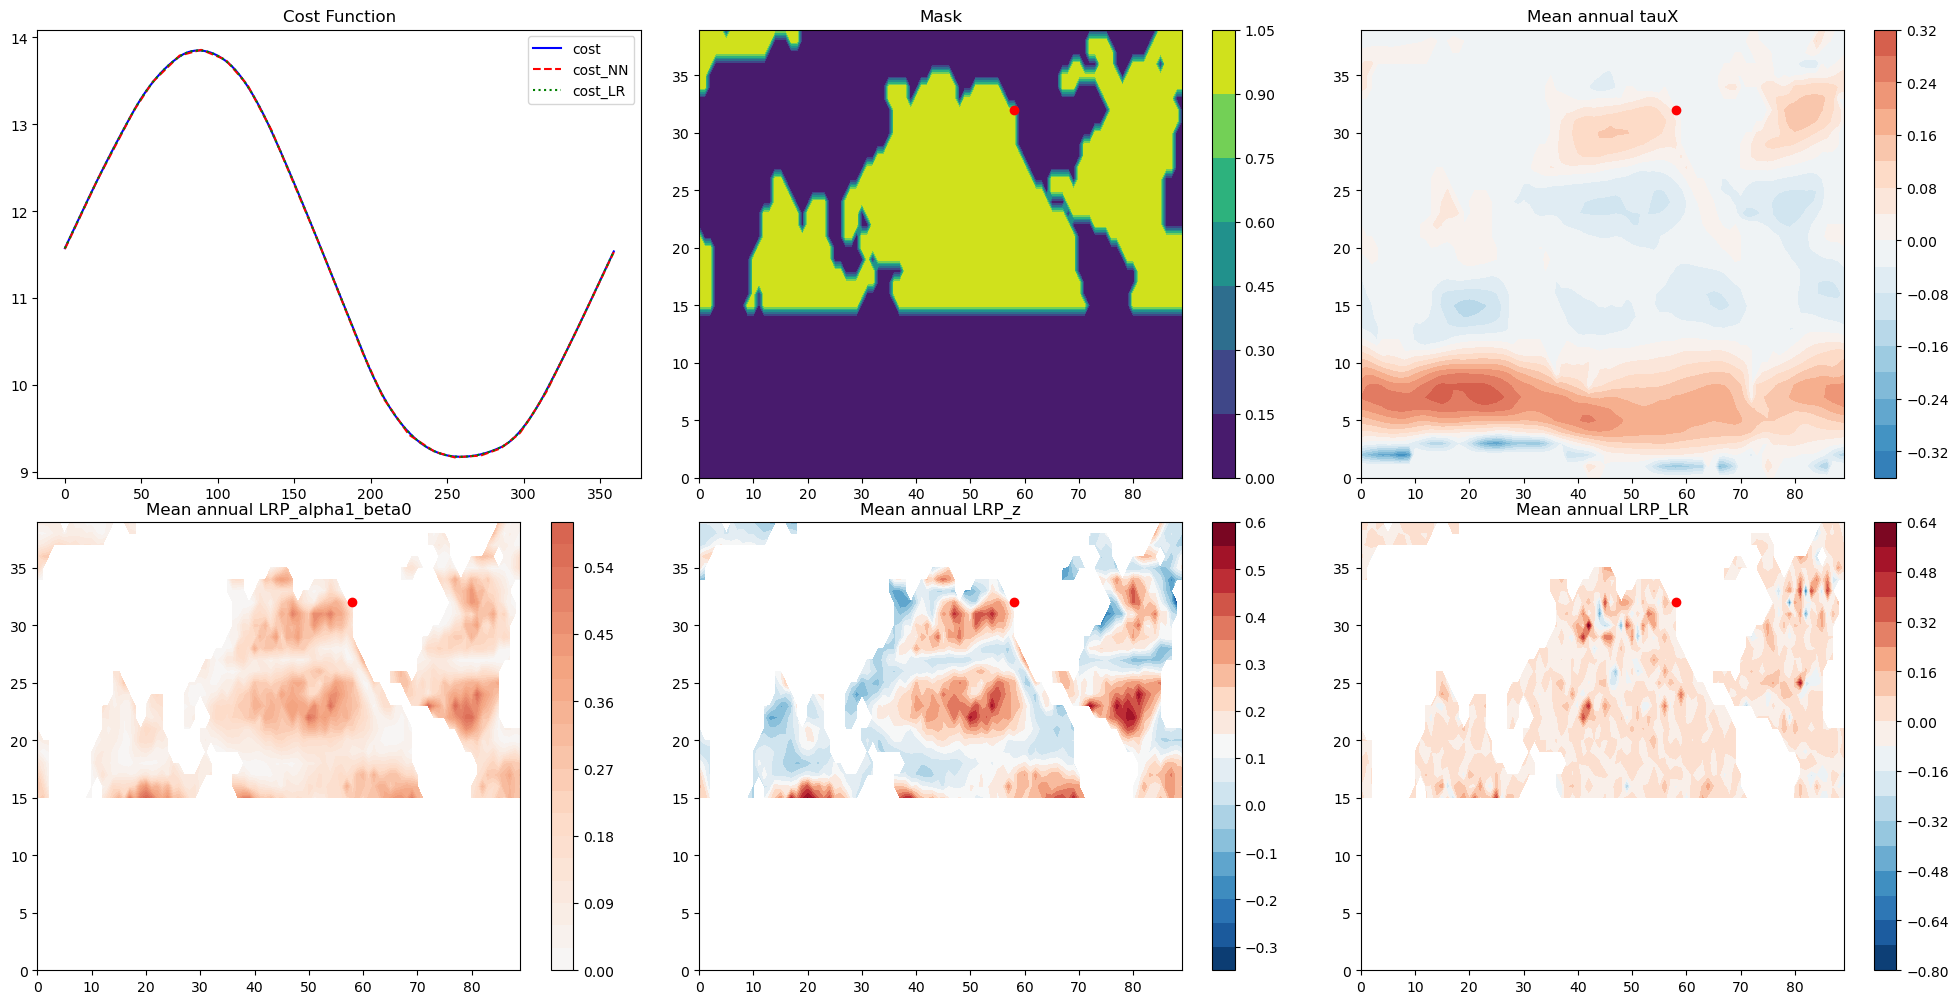

In [73]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[180:540], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauX, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauX')

p = ax[1,0].contourf(np.mean(rel_a1b0[0], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[0], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')

Text(0.5, 1.0, 'Mean annual LRP_LR')

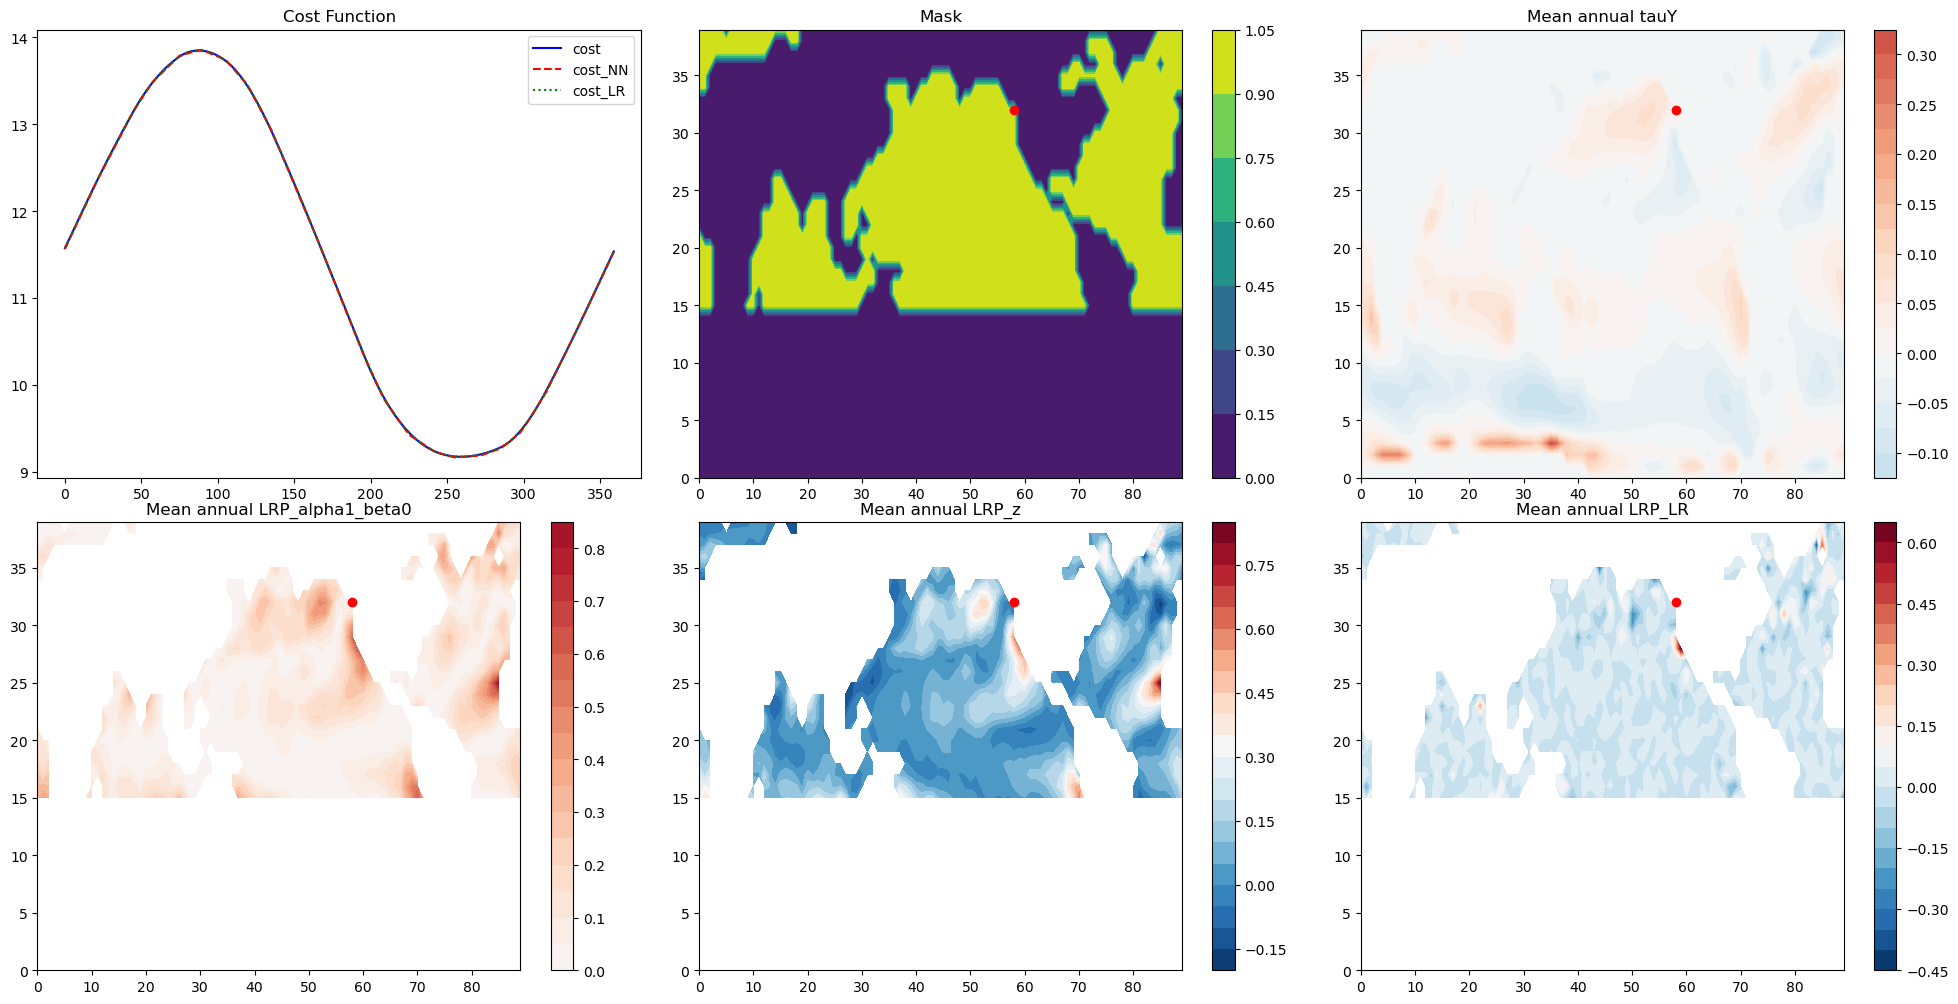

In [74]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(2,3)
fig.tight_layout()

ax[0,0].plot(cost[180:540], 'b', label = 'cost')
ax[0,0].plot(cost_predict[:360], 'r--', label = 'cost_NN')
ax[0,0].plot(cost_predict_LR[:360], 'g:', label = 'cost_LR')
ax[0,0].legend()
ax[0,0].set_title('Cost Function')

p = ax[0,1].contourf(latmask)
ax[0,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,1])
ax[0,1].set_title('Mask')

p = ax[0,2].contourf(np.mean(tauY, axis = 0)*pmask[0], vmin=-0.5, vmax=0.5, levels = 20, cmap = 'RdBu_r')
ax[0,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[0,2])
ax[0,2].set_title('Mean annual tauY')

p = ax[1,0].contourf(np.mean(rel_a1b0[1], axis = 0), vmin=-1, vmax=1, levels = 20, cmap = 'RdBu_r')
ax[1,0].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,0])
ax[1,0].set_title('Mean annual LRP_alpha1_beta0')

p = ax[1,1].contourf(np.mean(rel_z[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,1].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,1])
ax[1,1].set_title('Mean annual LRP_z')

p = ax[1,2].contourf(np.mean(rel_LR[1], axis = 0), levels = 20, cmap = 'RdBu_r')
ax[1,2].scatter([58],[32], color = 'red')
fig.colorbar(p, ax=ax[1,2])
ax[1,2].set_title('Mean annual LRP_LR')